In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SVM_scripts as svm
import sklearn as skl
import skopt.space as sks
from tqdm import tqdm
import pickle

In [6]:
file_name = 'Polaris/pgp-broccatelli.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)

NameError: name 'svm' is not defined

In [12]:
slice_sizes = [int(177/n) for n in [5,4,3,2,1]] + [350, 550, 750] + [None]
N = 20
kappas, accuracies, best_params = {slice_size: [] for slice_size in slice_sizes}, {slice_size: [] for slice_size in slice_sizes}, {slice_size: [] for slice_size in slice_sizes}
for i in tqdm(range(N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=80, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    param_grid = {'upper_bound': [1,10,100], 'kernel': [n*default_gamma for n in [0.25,0.5,0.75,1,1.5]]}
    for slice_size in slice_sizes:
        estimator = svm.slice_estimator(estimator=svm.cSVM_estimator(solver='svc', print_info=False), slice_size=slice_size, force_unbiased=False, seed=0)
        f, param_table, grid_search = svm.hyperparameter_optimization(estimator=estimator, param_grid=param_grid, vectors=vectors, labels=labels, print_info=False)
        test_values = f(test_vectors)
        kappas[slice_size] += [svm.kappa(test_values, test_labels)]
        accuracies[slice_size] += [svm.accuracy(test_values, test_labels)]
        best_params[slice_size] += [grid_search.best_params_]
slice_study_classical_results = {'kappas': kappas, 'accuracies': accuracies, 'best_params': best_params}
with open('results/slice_study_pgp-broccatelli_classical.pkl','wb') as f:
    pickle.dump(slice_study_classical_results, f)

  0%|          | 0/20 [00:00<?, ?it/s]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (521 positive, 453 negative)


  5%|▌         | 1/20 [04:57<1:34:06, 297.18s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (519 positive, 455 negative)


 10%|█         | 2/20 [10:02<1:30:32, 301.80s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (520 positive, 454 negative)


 15%|█▌        | 3/20 [15:02<1:25:22, 301.32s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (521 positive, 453 negative)


 20%|██        | 4/20 [20:05<1:20:26, 301.67s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (521 positive, 453 negative)


 25%|██▌       | 5/20 [24:59<1:14:42, 298.86s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (517 positive, 457 negative)


 30%|███       | 6/20 [29:56<1:09:37, 298.42s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (522 positive, 452 negative)


 35%|███▌      | 7/20 [34:51<1:04:25, 297.38s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (519 positive, 455 negative)


 40%|████      | 8/20 [39:48<59:23, 296.99s/it]  

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (514 positive, 460 negative)


 45%|████▌     | 9/20 [44:44<54:24, 296.80s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (515 positive, 459 negative)


 50%|█████     | 10/20 [49:51<50:00, 300.03s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (518 positive, 456 negative)


 55%|█████▌    | 11/20 [54:44<44:39, 297.73s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (513 positive, 461 negative)


 60%|██████    | 12/20 [1:00:22<41:21, 310.19s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (515 positive, 459 negative)


 65%|██████▌   | 13/20 [1:06:40<38:34, 330.68s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (525 positive, 449 negative)


 70%|███████   | 14/20 [1:12:52<34:18, 343.06s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (514 positive, 460 negative)


 75%|███████▌  | 15/20 [1:19:03<29:18, 351.64s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (509 positive, 465 negative)


 80%|████████  | 16/20 [1:25:23<23:59, 359.97s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (517 positive, 457 negative)


 85%|████████▌ | 17/20 [1:31:49<18:23, 367.87s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (516 positive, 458 negative)


 90%|█████████ | 18/20 [1:38:01<12:18, 369.20s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (522 positive, 452 negative)


 95%|█████████▌| 19/20 [1:44:14<06:10, 370.42s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (506 positive, 468 negative)


100%|██████████| 20/20 [1:55:42<00:00, 347.15s/it]


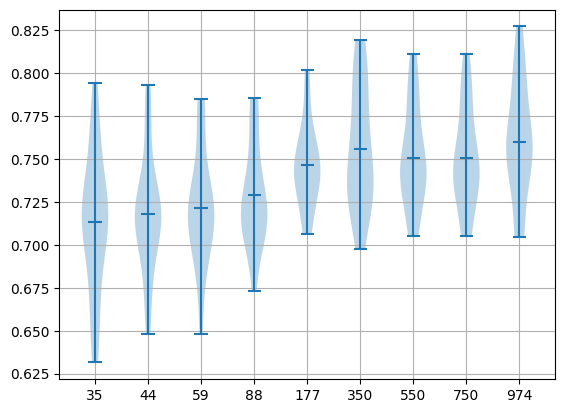

In [13]:
plt.violinplot(
    dataset=[slice_kappas for slice_size, slice_kappas in kappas.items()],
    showmeans=True,
    #showmedians=True
    #labels=list(kappas.keys())
)
plt.xticks(range(1,len(kappas)+1), [str(slice_size) if isinstance(slice_size, int) else 974 for slice_size in kappas.keys()])
plt.grid()
plt.show()

# plt.violinplot(
#     dataset=[slice_accuracies for slice_size, slice_accuracies in accuracies.items()],
#     showmeans=True,
#     #showmedians=True
#     #labels=list(accuracies.keys())
# )
# plt.show()

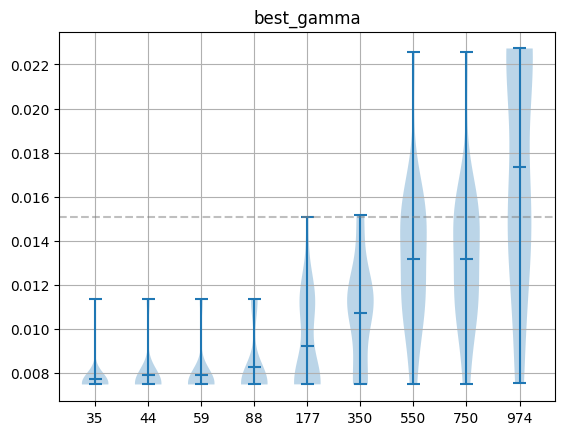

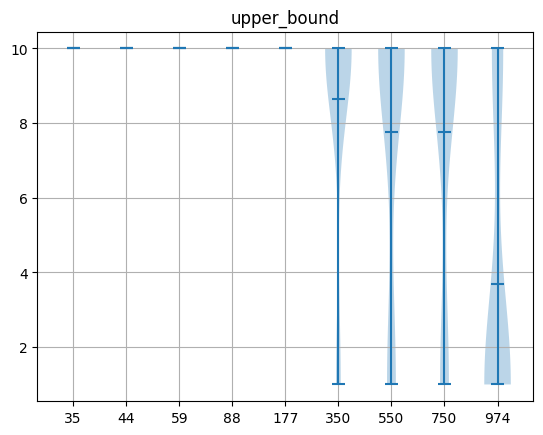

In [29]:
plt.violinplot(
    dataset=[[dic['sliced__estimator__kernel']for dic in params] for slice_size, params in best_params.items()],
    showmeans=True,
    #showmedians=True
    #labels=list(kappas.keys())
)
plt.xticks(range(1,len(best_params)+1), [str(slice_size) if isinstance(slice_size, int) else 974 for slice_size in best_params.keys()])
ax = plt.gca()
ax.axhline(y=default_gamma, c='gray', alpha=0.5, linestyle='--')
plt.title('best_gamma')
plt.grid()
plt.show()

plt.violinplot(
    dataset=[[dic['sliced__estimator__upper_bound']for dic in params] for slice_size, params in best_params.items()],
    showmeans=True,
    #showmedians=True
    #labels=list(kappas.keys())
)
plt.xticks(range(1,len(best_params)+1), [str(slice_size) if isinstance(slice_size, int) else 974 for slice_size in best_params.keys()])
plt.title('upper_bound')
plt.grid()
plt.show()

In [22]:
default_gamma = 1 / (vectors.shape[1] * vectors.var())
print(default_gamma)

0.015066704897692323


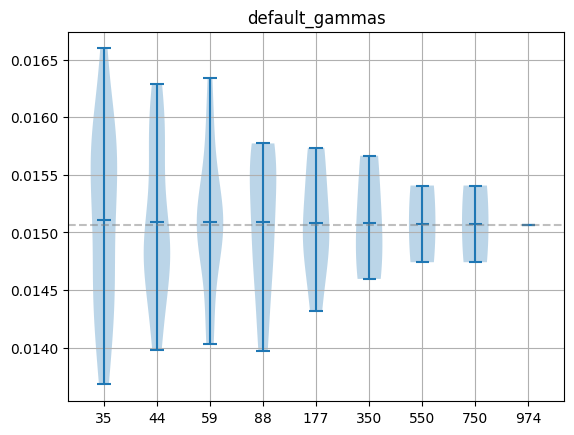

In [27]:
sgammas = {slice_size:[] for slice_size in slice_sizes}
for slice_size in slice_sizes:
    slices, slice_labels, counts = svm.slice_training_data(vectors, labels, slice_size=slice_size, force_unbiased=False, print_info=False, seed=0)
    sgammas[slice_size] = [1 / (slice.shape[1] * slice.var()) for slice in slices]
plt.violinplot(
    dataset=[slice_gammas for slice_size, slice_gammas in sgammas.items()],
    showmeans=True,
    #showmedians=True
    #labels=list(kappas.keys())
)
ax = plt.gca()
ax.axhline(y=default_gamma, c='gray', alpha=0.5, linestyle='--') # origin axis line
plt.xticks(range(1,len(best_params)+1), [str(slice_size) if isinstance(slice_size, int) else 974 for slice_size in best_params.keys()])
plt.title('default_gammas')
plt.grid()
plt.show()

In [61]:
file_name = 'Polaris/bbb-martins.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)
slice_sizes = [int(177/n) for n in [5,4,3,2,1]] + [300, 500, None]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1218 positive, 384 negative)


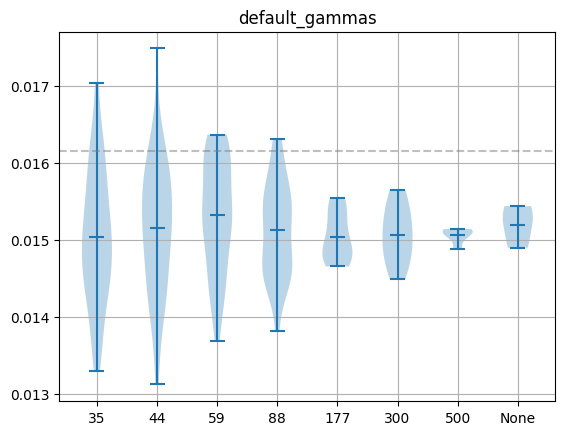

In [69]:
vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=80, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, print_info=True)
default_gamma = 1 / (vectors.shape[1] * vectors.var())
sgammas = {slice_size:[] for slice_size in slice_sizes}
for slice_size in slice_sizes:
    slices, slice_labels, counts = svm.slice_training_data(vectors, labels, slice_size=slice_size, force_unbiased=True, print_info=False, seed=0)
    sgammas[slice_size] = [1 / (slice.shape[1] * slice.var()) for slice in slices]
plt.violinplot(
    dataset=[slice_gammas for slice_size, slice_gammas in sgammas.items()],
    showmeans=True,
    #showmedians=True
    #labels=list(kappas.keys())
)
ax = plt.gca()
ax.axhline(y=default_gamma, c='gray', alpha=0.5, linestyle='--') # origin axis line
plt.xticks(range(1,len(sgammas)+1), [str(slice_size) for slice_size in sgammas.keys()])
plt.title('default_gammas')
plt.grid()
plt.show()

In [71]:
N = 20
kappas, accuracies, best_params = {slice_size: [] for slice_size in slice_sizes}, {slice_size: [] for slice_size in slice_sizes}, {slice_size: [] for slice_size in slice_sizes}
for dic in [kappas, accuracies, best_params]:
    dic['interpolation'] = []
for i in tqdm(range(N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=80, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    param_grid = {'upper_bound': [1,10,100], 'kernel': [n*default_gamma for n in [0.25,0.5,0.75,1,1.5]]}
    for slice_size in slice_sizes:
        estimator = svm.slice_estimator(estimator=svm.cSVM_estimator(solver='svc', print_info=False), slice_size=slice_size, force_unbiased=True, seed=0)
        f, param_table, grid_search, optimal_params = svm.hyperparameter_optimization(estimator=estimator, param_grid=param_grid, vectors=vectors, labels=labels, print_info=False)
        test_values = f(test_vectors)
        kappas[slice_size] += [svm.kappa(test_values, test_labels)]
        accuracies[slice_size] += [svm.accuracy(test_values, test_labels)]
        best_params[slice_size] += [optimal_params]
    # compare with interpolation:
    inter_vectors, inter_labels, _, _ = svm.prepare_data_sets(vectors, labels, train_percentage=100, positive_negative_ratio=1, max_train_size=None, min_train_size=int(2*1215), seed=0, print_info=True)
    estimator = estimator=svm.cSVM_estimator(solver='svc', print_info=False)
    f, param_table, grid_search, optimal_params = svm.hyperparameter_optimization(estimator=estimator, param_grid=param_grid, vectors=vectors, labels=labels, print_info=False)
    test_values = f(test_vectors)
    kappas['interpolation'] += [svm.kappa(test_values, test_labels)]
    accuracies['interpolation'] += [svm.accuracy(test_values, test_labels)]
    best_params['interpolation'] += [optimal_params]
slice_study_classical_results = {'kappas': kappas, 'accuracies': accuracies, 'best_params': best_params}
with open('results/slice_study_bbb-martins_classical.pkl','wb') as f:
    pickle.dump(slice_study_classical_results, f)

  0%|          | 0/20 [00:00<?, ?it/s]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1218 positive, 384 negative)
Data size: 1602 (1218 positive, 384 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 832 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


  5%|▌         | 1/20 [11:45<3:43:24, 705.49s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1222 positive, 380 negative)
Data size: 1602 (1222 positive, 380 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 836 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 10%|█         | 2/20 [23:40<3:33:24, 711.34s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1238 positive, 364 negative)
Data size: 1602 (1238 positive, 364 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 852 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 15%|█▌        | 3/20 [35:48<3:23:39, 718.77s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1236 positive, 366 negative)
Data size: 1602 (1236 positive, 366 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 850 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 20%|██        | 4/20 [47:57<3:12:42, 722.68s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1232 positive, 370 negative)
Data size: 1602 (1232 positive, 370 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 846 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 25%|██▌       | 5/20 [1:00:33<3:03:42, 734.81s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1226 positive, 376 negative)
Data size: 1602 (1226 positive, 376 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 840 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 30%|███       | 6/20 [1:13:22<2:54:12, 746.59s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1230 positive, 372 negative)
Data size: 1602 (1230 positive, 372 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 844 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 35%|███▌      | 7/20 [1:29:53<2:59:02, 826.36s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1225 positive, 377 negative)
Data size: 1602 (1225 positive, 377 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 839 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 40%|████      | 8/20 [16:23:07<58:45:00, 17625.08s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1223 positive, 379 negative)
Data size: 1602 (1223 positive, 379 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 837 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 45%|████▌     | 9/20 [16:35:37<37:44:04, 12349.53s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1225 positive, 377 negative)
Data size: 1602 (1225 positive, 377 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 839 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 50%|█████     | 10/20 [16:47:53<24:20:44, 8764.43s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1232 positive, 370 negative)
Data size: 1602 (1232 positive, 370 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 846 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 55%|█████▌    | 11/20 [16:59:54<15:45:23, 6302.66s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1250 positive, 352 negative)
Data size: 1602 (1250 positive, 352 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 864 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 60%|██████    | 12/20 [17:12:53<10:16:18, 4622.28s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1222 positive, 380 negative)
Data size: 1602 (1222 positive, 380 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 836 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 65%|██████▌   | 13/20 [17:25:37<6:42:54, 3453.55s/it] 

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1241 positive, 361 negative)
Data size: 1602 (1241 positive, 361 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 855 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 70%|███████   | 14/20 [17:38:25<4:24:14, 2642.37s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1230 positive, 372 negative)
Data size: 1602 (1230 positive, 372 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 844 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 75%|███████▌  | 15/20 [17:50:21<2:51:47, 2061.59s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1224 positive, 378 negative)
Data size: 1602 (1224 positive, 378 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 838 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 80%|████████  | 16/20 [18:02:56<1:51:13, 1668.38s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1239 positive, 363 negative)
Data size: 1602 (1239 positive, 363 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 853 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 85%|████████▌ | 17/20 [18:18:09<1:12:03, 1441.29s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1235 positive, 367 negative)
Data size: 1602 (1235 positive, 367 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 849 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 90%|█████████ | 18/20 [18:45:05<49:47, 1493.71s/it]  

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1234 positive, 368 negative)
Data size: 1602 (1234 positive, 368 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 848 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


 95%|█████████▌| 19/20 [19:01:14<22:16, 1336.18s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1602 (1230 positive, 372 negative)
Data size: 1602 (1230 positive, 372 negative)
0 vectors removed due to inconsistently labelled degeneracies
Added 844 synthetic negatives by oversampling
Training data size: 2432 (1216 positive, 1216 negative)


100%|██████████| 20/20 [19:14:19<00:00, 3462.97s/it]


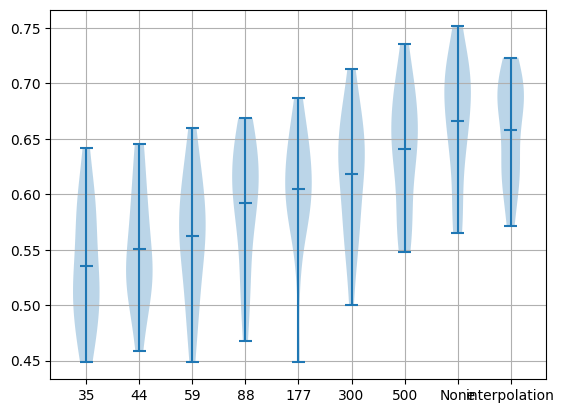

In [72]:
plt.violinplot(
    dataset=[slice_kappas for slice_size, slice_kappas in kappas.items()],
    showmeans=True,
    #showmedians=True
    #labels=list(kappas.keys())
)
plt.xticks(range(1,len(kappas)+1), [str(slice_size) for slice_size in kappas.keys()])
plt.grid()
plt.show()

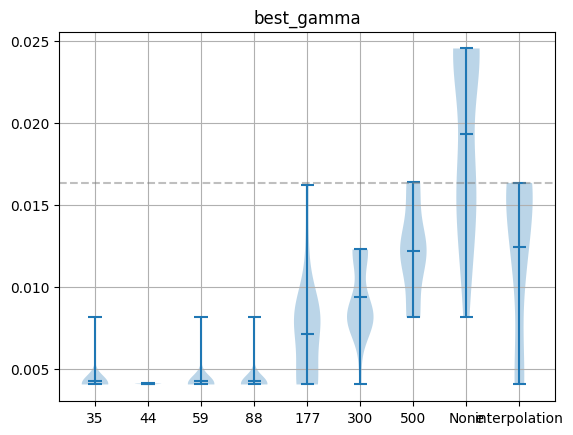

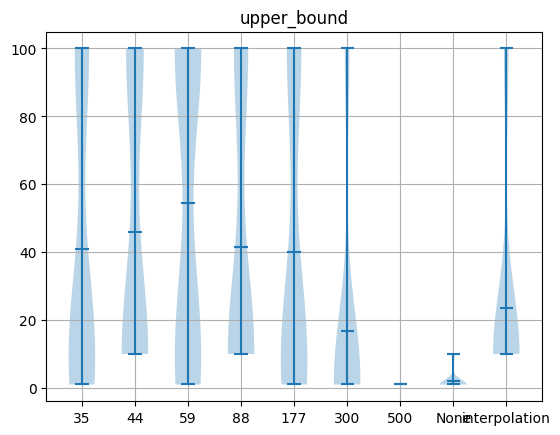

In [94]:
plt.violinplot(
    dataset=[[dic['sliced__estimator__kernel'] for dic in params] if isinstance(slice_size, int) or slice_size is None else [dic['kernel'] for dic in params] for slice_size, params in best_params.items()],
    showmeans=True,
    #showmedians=True
    #labels=list(kappas.keys())
)
plt.xticks(range(1,len(best_params)+1), [str(slice_size) for slice_size in best_params.keys()])
ax = plt.gca()
ax.axhline(y=default_gamma, c='gray', alpha=0.5, linestyle='--')
plt.title('best_gamma')
plt.grid()
plt.show()

plt.violinplot(
    dataset=[[dic['sliced__estimator__upper_bound']for dic in params] if isinstance(slice_size, int) or slice_size is None else [dic['upper_bound'] for dic in params] for slice_size, params in best_params.items()],
    showmeans=True,
    #showmedians=True
    #labels=list(kappas.keys())
)
plt.xticks(range(1,len(best_params)+1), [str(slice_size) for slice_size in best_params.keys()])
plt.title('upper_bound')
plt.grid()
plt.show()

In [2]:
file_name = 'Polaris/pgp-broccatelli.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)

In [3]:
slice_sizes = [int(177/n) for n in [4,3,2,1]] + [350, 550, 750] + [None]
N = 5
kappas, accuracies, best_params = {slice_size: [] for slice_size in slice_sizes}, {slice_size: [] for slice_size in slice_sizes}, {slice_size: [] for slice_size in slice_sizes}
for i in tqdm(range(N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=80, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    param_grid = {'base': [2,10], 'num_encoding': [1,2,3],'kernel': [n*default_gamma for n in [1]], 'penalty': [0,0.1,0.2,0.4,0.6,1]}
    for slice_size in slice_sizes:
        print(slice_size)
        filter = lambda base, num_encoding, kernel, penalty: num_encoding  < 2000/slice_size if isinstance(slice_size, int) else 2
        estimator = svm.slice_estimator(estimator=svm.qSVM_estimator(solver='SA', adjust_bias=True), slice_size=slice_size, force_unbiased=False, seed=0)
        f, param_table, grid_search, optimal_params = svm.hyperparameter_optimization(estimator=estimator, param_grid=param_grid, vectors=vectors, labels=labels, folds=3, filter=filter, print_info=True)
        test_values = f(test_vectors)
        kappas[slice_size] += [svm.kappa(test_values, test_labels)]
        accuracies[slice_size] += [svm.accuracy(test_values, test_labels)]
        best_params[slice_size] += [optimal_params]
slice_study_SA_results = {'kappas': kappas, 'accuracies': accuracies, 'best_params': best_params}
with open('results/slice_study_pgp-broccatelli_SA.pkl','wb') as f:
    pickle.dump(slice_study_SA_results, f)

  0%|          | 0/5 [00:00<?, ?it/s]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
[[0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
Training data size: 974 (521 positive, 453 negative)
44
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   4.2s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   3.7s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   3.8s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0

,base,kernel,num_encoding,penalty,mean kappa,std kappa
6,2,0.000977,2,0.0,0.674427,0.037885
0,2,0.000977,1,0.0,0.671174,0.042880
18,10,0.000977,1,0.0,0.671174,0.042880
12,2,0.000977,3,0.0,0.666816,0.029117
24,10,0.000977,2,0.0,0.666413,0.040817
30,10,0.000977,3,0.0,0.666413,0.040817
31,10,0.000977,3,0.1,0.663297,0.038454
25,10,0.000977,2,0.1,0.661323,0.036684
7,2,0.000977,2,0.1,0.654347,0.028542
13,2,0.000977,3,0.1,0.649974,0.030122


59
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   3.9s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   4.0s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   4.0s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=   4.7s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=   4.7s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, s

,base,kernel,num_encoding,penalty,mean kappa,std kappa
6,2,0.000977,2,0.0,0.696444,0.013314
12,2,0.000977,3,0.0,0.692700,0.008504
31,10,0.000977,3,0.1,0.665465,0.031713
25,10,0.000977,2,0.1,0.659312,0.026667
30,10,0.000977,3,0.0,0.659283,0.031369
7,2,0.000977,2,0.1,0.658465,0.026955
0,2,0.000977,1,0.0,0.657049,0.043228
18,10,0.000977,1,0.0,0.657049,0.043228
13,2,0.000977,3,0.1,0.656025,0.025505
24,10,0.000977,2,0.0,0.655277,0.033247


88
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   3.6s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   3.8s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   4.1s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=   4.7s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=   4.3s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, s

,base,kernel,num_encoding,penalty,mean kappa,std kappa
6,2,0.000977,2,0.0,0.704531,0.003555
12,2,0.000977,3,0.0,0.700798,0.015696
24,10,0.000977,2,0.0,0.672729,0.036211
30,10,0.000977,3,0.0,0.670729,0.034842
7,2,0.000977,2,0.1,0.658536,0.020340
31,10,0.000977,3,0.1,0.657776,0.020573
13,2,0.000977,3,0.1,0.656297,0.019665
25,10,0.000977,2,0.1,0.655798,0.022235
16,2,0.000977,3,0.6,0.654497,0.038012
17,2,0.000977,3,1.0,0.648311,0.036816


177
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   6.2s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   6.3s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   6.3s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=   7.8s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=   7.3s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, 

,base,kernel,num_encoding,penalty,mean kappa,std kappa
6,2,0.000977,2,0.0,0.724245,0.013662
12,2,0.000977,3,0.0,0.722498,0.015832
0,2,0.000977,1,0.0,0.702599,0.012110
18,10,0.000977,1,0.0,0.702599,0.012110
30,10,0.000977,3,0.0,0.698428,0.025712
24,10,0.000977,2,0.0,0.694651,0.018677
7,2,0.000977,2,0.1,0.670980,0.019958
10,2,0.000977,2,0.6,0.670486,0.020059
19,10,0.000977,1,0.1,0.669302,0.044849
1,2,0.000977,1,0.1,0.669302,0.044849


350
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  11.4s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  11.4s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  11.5s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=  14.6s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=  12.6s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, 

,base,kernel,num_encoding,penalty,mean kappa,std kappa
12,2,0.000977,3,0.0,0.740253,0.028555
6,2,0.000977,2,0.0,0.731716,0.015968
0,2,0.000977,1,0.0,0.703796,0.071573
18,10,0.000977,1,0.0,0.703796,0.071573
11,2,0.000977,2,1.0,0.691795,0.035783
9,2,0.000977,2,0.4,0.689655,0.028489
17,2,0.000977,3,1.0,0.689448,0.028974
30,10,0.000977,3,0.0,0.688975,0.068209
24,10,0.000977,2,0.0,0.686945,0.062541
15,2,0.000977,3,0.4,0.685730,0.026907


550
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  12.4s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  12.3s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  11.5s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=  15.7s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=  13.4s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, 

,base,kernel,num_encoding,penalty,mean kappa,std kappa
12,2,0.000977,3,0.0,0.740253,0.028555
6,2,0.000977,2,0.0,0.731716,0.015968
0,2,0.000977,1,0.0,0.703796,0.071573
18,10,0.000977,1,0.0,0.703796,0.071573
11,2,0.000977,2,1.0,0.691795,0.035783
9,2,0.000977,2,0.4,0.689655,0.028489
17,2,0.000977,3,1.0,0.689448,0.028974
30,10,0.000977,3,0.0,0.688975,0.068209
24,10,0.000977,2,0.0,0.686945,0.062541
15,2,0.000977,3,0.4,0.685730,0.026907


750
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  29.1s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  29.0s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  27.4s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=  36.9s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=  29.7s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, s

,base,kernel,num_encoding,penalty,mean kappa,std kappa
6,2,0.000977,2,0.0,0.727103,0.016791
18,10,0.000977,2,0.0,0.715456,0.028781
10,2,0.000977,2,0.6,0.702590,0.032296
9,2,0.000977,2,0.4,0.702590,0.041032
11,2,0.000977,2,1.0,0.702387,0.041190
7,2,0.000977,2,0.1,0.696385,0.041664
8,2,0.000977,2,0.2,0.690199,0.041693
0,2,0.000977,1,0.0,0.681764,0.038926
12,10,0.000977,1,0.0,0.681764,0.038926
5,2,0.000977,1,1.0,0.678225,0.031870


None
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  25.7s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  27.2s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=  31.0s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=  36.5s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.1; total time=  29.8s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000004,

,base,kernel,num_encoding,penalty,mean kappa,std kappa
12,2,0.000977,3,0.0,0.733534,0.021535
6,2,0.000977,2,0.0,0.727103,0.016791
17,2,0.000977,3,1.0,0.717293,0.043740
24,10,0.000977,2,0.0,0.715456,0.028781
10,2,0.000977,2,0.6,0.702590,0.032296
9,2,0.000977,2,0.4,0.702590,0.041032
11,2,0.000977,2,1.0,0.702387,0.041190
30,10,0.000977,3,0.0,0.698846,0.025540
7,2,0.000977,2,0.1,0.696385,0.041664
13,2,0.000977,3,0.1,0.696261,0.050424


 20%|██        | 1/5 [35:07:31<140:30:07, 126451.80s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Training data size: 974 (519 positive, 455 negative)
44
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000007, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   4.7s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000007, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   4.5s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000007, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0; total time=   4.7s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=0.0009765625000000007, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0

 20%|██        | 1/5 [35:08:57<140:35:49, 126537.40s/it]


KeyboardInterrupt: 

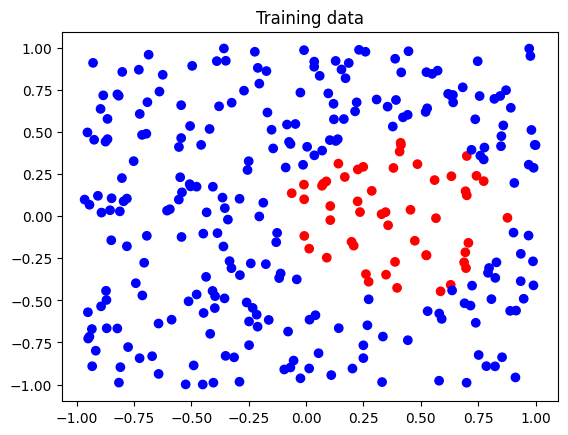

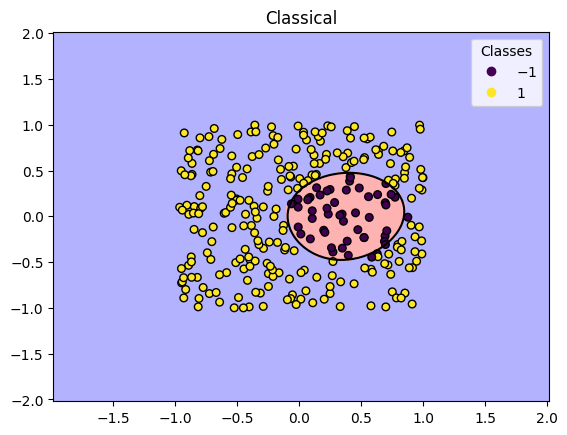

Classical Kappa: 0.9642913823202667


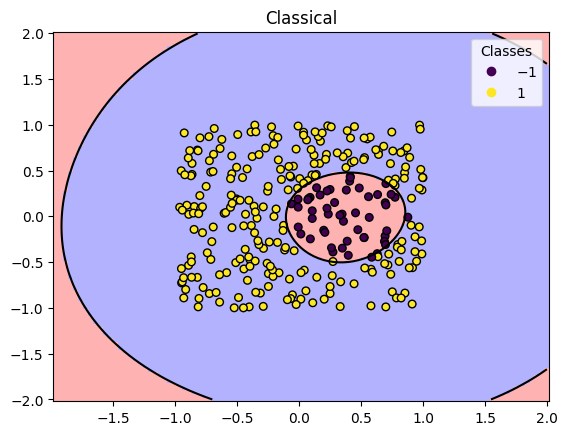

Classical Kappa: 0.952755905511811


In [10]:
slice_sizes = 88
N = 300
matrix = np.transpose([2*np.random.rand(N)-1, 2*np.random.rand(N)-1])
matrix_labels = np.array([2*int(((x-0.4)**2 + y**2) > 0.5**2) - 1 for x,y in matrix])
x, y = np.transpose(matrix)
plt.scatter(x,y, c=['blue' if matrix_labels[i] > 0 else 'red' for i in range(N)])
plt.title('Training data')
#plt.savefig('test.png', dpi=300)
plt.show()
default_gamma = 1 / (vectors.shape[1] * vectors.var())
param_grid = {'base': [2,10], 'num_encoding': [1,2,3],'kernel': [n*default_gamma for n in [1]], 'penalty': [0,0.25,0.5,1]}
filter = lambda base, num_encoding, kernel, penalty: num_encoding  < 1300/slice_size if isinstance(slice_size, int) else 2
estimator1=svm.qSVM_estimator(solver='SA', base=2, num_encoding=1, kernel=None, adjust_bias=False, print_info=False)
estimator1.fit(matrix, matrix_labels)
f = estimator1.decision_function
svm.plot_training_data_with_decision_boundary(estimator1, matrix, matrix_labels, plot_margins=False, title='Classical', support_vectors=False, save=False)
print('Classical Kappa:', svm.kappa(f(matrix), matrix_labels))
estimator2=svm.qSVM_estimator(solver='SA', base=2, num_encoding=1, kernel=None, adjust_bias=True, print_info=False)
estimator2.fit(matrix, matrix_labels)
f = estimator2.decision_function
svm.plot_training_data_with_decision_boundary(estimator2, matrix, matrix_labels, plot_margins=False, title='Classical', support_vectors=False, save=False)
print('Classical Kappa:', svm.kappa(f(matrix), matrix_labels))

In [5]:
vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=80, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=0, print_info=True)
default_gamma = 1 / (vectors.shape[1] * vectors.var())
param_grid = {'upper_bound': [1,10,100], 'kernel': [n*default_gamma for n in [0.25,0.5,0.75,1,1.5]]}
slice_size = 300
estimator = svm.slice_estimator(estimator=svm.cSVM_estimator(solver='svc', print_info=False), slice_size=slice_size, force_unbiased=False, seed=0)
f, param_table, grid_search, optimal_params = svm.hyperparameter_optimization(estimator=estimator, param_grid=param_grid, vectors=vectors, labels=labels, print_info=2)
test_values = f(test_vectors)

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 974 (521 positive, 453 negative)
Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END sliced__estimator__kernel=0.003763319597000087, sliced__estimator__upper_bound=1; total time=   0.0s
[CV] END sliced__estimator__kernel=0.003763319597000087, sliced__estimator__upper_bound=1; total time=   0.0s
[CV] END sliced__estimator__kernel=0.003763319597000087, sliced__estimator__upper_bound=1; total time=   0.0s
[CV] END sliced__estimator__kernel=0.003763319597000087, sliced__estimator__upper_bound=1; total time=   0.0s
[CV] END sliced__estimator__kernel=0.003763319597000087, sliced__estimator__upper_bound=1; total time=   0.0s
[CV] END sliced__estimator__kernel=0.003763319597000087, sliced__estimator__upper_bound=10; total time=   0.0s
[CV] END sliced__estimator__kernel=0.003763319597000087, sliced__estimator__upper_bound=10; total time=   0.0s
[CV] EN

KeyboardInterrupt: 

In [2]:
# classical bayes vs grid:
kappas_train = {'grid': [], 'bayes': [], 'bayes2': []}
kappas_test = {'grid': [], 'bayes': [], 'bayes2': []}
N = 5
file_name = 'Polaris/pgp-broccatelli.parquet'
# file_name = 'Polaris/bbb-martins.parquet'
# file_name = 'Polaris/ncats-solubility.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)
for i in tqdm(range(N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    param_grid = {'C': [1,10,100], 'gamma':[n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]], 'slice_size': [44,59,88,177], 'adjust_outer_bias': [False, True]}
    search_space = {
        'C': sks.Categorical([1,10,100]),
        'gamma': sks.Categorical([n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]]),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_space2 = {
        'C': sks.Real(1,100, prior='log-uniform'),
        'gamma': sks.Real(0.1 * default_gamma, 5 * default_gamma),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_size = svm.estimate_search_space_size(search_space, samples_per_real_interval=5)[0]
    limit = round(svm.samples_per_size(search_size))
    search_size2 = svm.estimate_search_space_size(search_space2, samples_per_real_interval=5)[0]
    limit2 = round(svm.samples_per_size(search_size2))
    inner_estimator = skl.svm.SVC()
    estimator=svm.slice_estimator(estimator=inner_estimator, force_unbiased=False, seed=0, print_info=False)
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit, mode='grid', filter=None, print_info=1, seed=0)
    kappas_train['grid'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['grid'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space2, vectors, labels, folds=5, limit=limit2, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes2'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes2'] += [svm.kappa(f(vectors), labels)]

  0%|          | 0/5 [00:00<?, ?it/s]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (330 positive, 279 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
8               False   10  0.000098          88    0.694305   0.040824
20              False   10  0.000098          88    0.694305   0.040824
6               False   10  0.000244         177    0.692236   0.032995
1               False   10  0.000977         177    0.673427   0.038456
11               True  100  0.000488          44    0.672588   0.031789
Iteration 3/24: New best score found
Iteration 7/24: New best score found
Iteration 10/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
9               False   10  0.000488         177    0.691299   0.019826
23               True  100  0.000488          59    0.690796   0.044064
19              Fa

 20%|██        | 1/5 [06:50<27:20, 410.02s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (332 positive, 277 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
8               False   10  0.000098          88    0.700414   0.049374
20              False   10  0.000098          88    0.700414   0.049374
6               False   10  0.000244         177    0.699600   0.037793
22               True  100  0.000732          88    0.672919   0.030617
3                True  100  0.000098          44    0.667265   0.062348
Iteration 3/24: New best score found
Iteration 10/24: New best score found
Iteration 12/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
11              False    1  0.000488         177    0.699413   0.053189
18              False  100  0.000488         177    0.698530   0.026667
9               F

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [False, 3.890217488400119, 0.0021510835623714626, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 39.374011061925955, 0.00023697732440579775, 88]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 5.96195566986082, 0.0013053165333394435, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 16.663921507976937, 0.00434300306500603, 88]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [False, 10.311238646309858, 0.003943819802089222, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [False, 1.0526645307594045, 0.003485575008684836, 59]
  warnings.warn(


    adjust_outer_bias           C     gamma  slice_size  mean kappa  std kappa
11              False  100.000000  0.000098         177    0.693804   0.040315
12              False  100.000000  0.000098          44    0.684888   0.053168
15               True  100.000000  0.000098          44    0.667265   0.062348
14               True   39.374011  0.000237          88    0.641750   0.101096
9               False    7.592193  0.001350         177    0.620526   0.059906


 40%|████      | 2/5 [13:24<20:02, 400.79s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (327 positive, 282 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
6               False   10  0.000244         177    0.706936   0.087270
20              False   10  0.000098          88    0.694756   0.068191
8               False   10  0.000098          88    0.694756   0.068191
7                True   10  0.000488         177    0.682045   0.072434
3                True  100  0.000098          44    0.674240   0.096587
Iteration 3/24: New best score found
Iteration 4/24: New best score found
Iteration 10/24: New best score found
Iteration 17/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
16              False   10  0.000098         177    0.707601   0.063426
9               False   10  0.000488         177    

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000011e-05, 44] before, using random point [False, 3.890217488400119, 0.002151083562371462, 59]
  warnings.warn(


    adjust_outer_bias           C     gamma  slice_size  mean kappa  std kappa
12              False  100.000000  0.000098          88    0.698150   0.066953
11              False  100.000000  0.000098          44    0.685249   0.071130
16               True  100.000000  0.000098          59    0.683041   0.082225
17               True  100.000000  0.000098          88    0.675738   0.102542
19               True   22.501647  0.000098          44    0.674240   0.096587


 60%|██████    | 3/5 [20:01<13:18, 399.33s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (315 positive, 294 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias   C     gamma  slice_size  mean kappa  std kappa
6               False  10  0.000244         177    0.707521   0.041129
7                True  10  0.000488         177    0.694170   0.033864
20              False  10  0.000098          88    0.691660   0.046175
8               False  10  0.000098          88    0.691660   0.046175
1               False  10  0.000977         177    0.671037   0.034726
Iteration 3/24: New best score found
Iteration 10/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
9               False   10  0.000488         177    0.700794   0.034218
15               True  100  0.000488         177    0.694170   0.033864
21               True   10  0.000488         177    0.694170 

 80%|████████  | 4/5 [27:01<06:47, 407.21s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (328 positive, 281 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
6               False   10  0.000244         177    0.748785   0.072014
7                True   10  0.000488         177    0.728532   0.071626
20              False   10  0.000098          88    0.726540   0.050432
8               False   10  0.000098          88    0.726540   0.050432
3                True  100  0.000098          44    0.722737   0.066370
Iteration 3/24: New best score found
Iteration 4/24: New best score found
Iteration 10/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
9               False   10  0.000488         177    0.748345   0.063745
12              False   10  0.000098         177    0.732729   0.062082
11              Fa

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 39.374011061925955, 0.00023697732440579775, 88]
  warnings.warn(


Iteration 15/20: New best score found
Iteration 16/20: New best score found


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 16.663921507976937, 0.00434300306500603, 88]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765625000000014e-05, 44] before, using random point [False, 10.311238646309858, 0.003943819802089222, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765625000000014e-05, 44] before, using random point [False, 1.0526645307594045, 0.003485575008684836, 59]
  warnings.warn(


    adjust_outer_bias           C     gamma  slice_size  mean kappa  std kappa
15               True   36.458226  0.000098          88    0.731384   0.072384
14               True   39.374011  0.000237          88    0.728614   0.064206
13               True  100.000000  0.000098          44    0.722737   0.066370
16               True    1.000000  0.000098          44    0.704871   0.059037
10              False    9.517195  0.000926         177    0.700648   0.059993


100%|██████████| 5/5 [33:49<00:00, 405.94s/it]


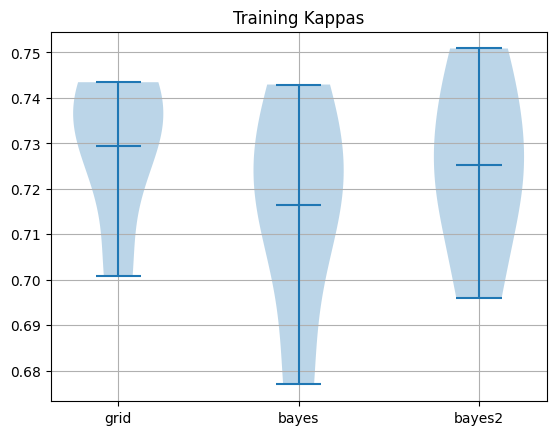

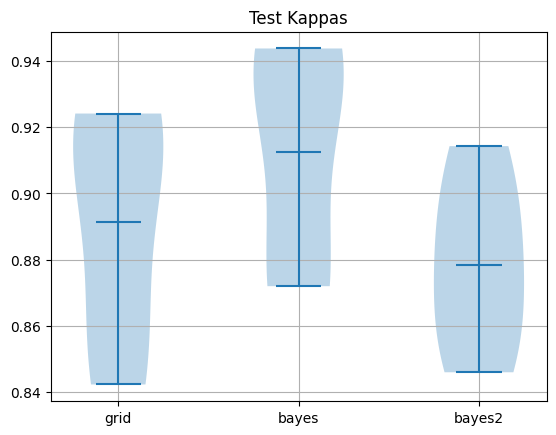

In [7]:
plt.violinplot(dataset=[kappas for mode, kappas in kappas_train.items()], showmeans=True)
plt.title('Training Kappas')
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.grid()
plt.show()
plt.violinplot(
dataset=[kappas for mode, kappas in kappas_test.items()], showmeans=True)
plt.title('Test Kappas')
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.grid()
plt.show()

In [2]:
# classical bayes vs grid second round with higher limits:
kappas_train = {'grid': [], 'bayes': [], 'bayes2': []}
kappas_test = {'grid': [], 'bayes': [], 'bayes2': []}
N = 5
file_name = 'Polaris/pgp-broccatelli.parquet'
# file_name = 'Polaris/bbb-martins.parquet'
# file_name = 'Polaris/ncats-solubility.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)
for i in tqdm(range(N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    param_grid = {'C': [1,10,100], 'gamma':[n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]], 'slice_size': [44,59,88,177], 'adjust_outer_bias': [False, True]}
    search_space = {
        'C': sks.Categorical([1,10,100]),
        'gamma': sks.Categorical([n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]]),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_space2 = {
        'C': sks.Real(1,100, prior='log-uniform'),
        'gamma': sks.Real(0.1 * default_gamma, 5 * default_gamma),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_size = svm.estimate_search_space_size(search_space, samples_per_real_interval=7)[0]
    limit = round(svm.samples_per_size(search_size))
    search_size2 = svm.estimate_search_space_size(search_space2, samples_per_real_interval=7)[0]
    limit2 = round(svm.samples_per_size(search_size2))
    inner_estimator = skl.svm.SVC()
    estimator=svm.slice_estimator(estimator=inner_estimator, force_unbiased=False, seed=0, print_info=False)
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit2, mode='grid', filter=None, print_info=1, seed=0)
    kappas_train['grid'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['grid'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit2, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space2, vectors, labels, folds=5, limit=limit2, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes2'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes2'] += [svm.kappa(f(vectors), labels)]

  0%|          | 0/5 [00:00<?, ?it/s]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (330 positive, 279 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias   C     gamma  slice_size  mean kappa  std kappa
20              False  10  0.000098          88    0.694305   0.040824
8               False  10  0.000098          88    0.694305   0.040824
6               False  10  0.000244         177    0.692236   0.032995
38              False  10  0.000244         177    0.692236   0.032995
31              False  10  0.000098          59    0.687397   0.039856
Iteration 3/39: New best score found
Iteration 7/39: New best score found
Iteration 10/39: New best score found
Iteration 29/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
28              False  100  0.000098         177    0.705731   0.014366
31              False   10  0.000098         177    0.6962

 20%|██        | 1/5 [07:52<31:31, 472.97s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (332 positive, 277 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias   C     gamma  slice_size  mean kappa  std kappa
20              False  10  0.000098          88    0.700414   0.049374
8               False  10  0.000098          88    0.700414   0.049374
38              False  10  0.000244         177    0.699600   0.037793
6               False  10  0.000244         177    0.699600   0.037793
31              False  10  0.000098          59    0.687339   0.039553
Iteration 3/39: New best score found
Iteration 10/39: New best score found
Iteration 12/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
11              False    1  0.000488         177    0.699413   0.053189
18              False  100  0.000488         177    0.698530   0.026667
9               False  

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [False, 3.890217488400119, 0.0021510835623714626, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 39.374011061925955, 0.00023697732440579775, 88]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 5.96195566986082, 0.0013053165333394435, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 16.663921507976937, 0.00434300306500603, 88]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [False, 10.311238646309858, 0.003943819802089222, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [False, 1.0526645307594045, 0.003485575008684836, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 93.77733307369746, 0.002378692106436149, 59]
  warnings.warn(


Iteration 26/39: New best score found
    adjust_outer_bias           C     gamma  slice_size  mean kappa  std kappa
31              False   23.406551  0.000098          59    0.697367   0.039500
25              False  100.000000  0.000098          59    0.697367   0.039500
37              False   23.005769  0.000098          59    0.697367   0.039500
35              False   22.414877  0.000098          59    0.697367   0.039500
30              False   19.144450  0.000098          59    0.694054   0.039622


 40%|████      | 2/5 [16:16<24:33, 491.14s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (327 positive, 282 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
38              False   10  0.000244         177    0.706936   0.087270
6               False   10  0.000244         177    0.706936   0.087270
8               False   10  0.000098          88    0.694756   0.068191
20              False   10  0.000098          88    0.694756   0.068191
36               True  100  0.000244         177    0.689380   0.077011
Iteration 3/39: New best score found
Iteration 4/39: New best score found
Iteration 10/39: New best score found
Iteration 17/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
16              False   10  0.000098         177    0.707601   0.063426
24              False   10  0.000244         177    

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765625000000011e-05, 44] before, using random point [False, 3.890217488400119, 0.002151083562371462, 59]
  warnings.warn(


    adjust_outer_bias           C     gamma  slice_size  mean kappa  std kappa
12              False  100.000000  0.000098          88    0.698150   0.066953
21              False   47.023024  0.000098          88    0.698150   0.066953
38              False   28.783421  0.000098          59    0.697945   0.070070
29              False   29.626883  0.000098          59    0.697945   0.070070
23              False   55.502272  0.000098          59    0.697945   0.070070


 60%|██████    | 3/5 [24:30<16:24, 492.17s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (315 positive, 294 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias   C     gamma  slice_size  mean kappa  std kappa
38              False  10  0.000244         177    0.707521   0.041129
6               False  10  0.000244         177    0.707521   0.041129
7                True  10  0.000488         177    0.694170   0.033864
8               False  10  0.000098          88    0.691660   0.046175
20              False  10  0.000098          88    0.691660   0.046175
Iteration 3/39: New best score found
Iteration 10/39: New best score found
Iteration 36/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
35              False  100  0.000098          88    0.707966   0.053707
24              False  100  0.000488         177    0.700794   0.034218
9               False  

 80%|████████  | 4/5 [33:29<08:30, 510.91s/it]

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (328 positive, 281 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
37               True  100  0.000244         177    0.758710   0.063523
36               True  100  0.000244         177    0.758710   0.063523
38              False   10  0.000244         177    0.748785   0.072014
6               False   10  0.000244         177    0.748785   0.072014
31              False   10  0.000098          59    0.732457   0.065431
Iteration 3/39: New best score found
Iteration 4/39: New best score found
Iteration 10/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
9               False   10  0.000488         177    0.748345   0.063745
30               True   10  0.000244          88    0.735271   0.075605
12              Fa

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 39.374011061925955, 0.00023697732440579775, 88]
  warnings.warn(


Iteration 15/39: New best score found
Iteration 16/39: New best score found


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765625000000014e-05, 44] before, using random point [True, 16.663921507976937, 0.00434300306500603, 88]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765625000000014e-05, 44] before, using random point [False, 10.311238646309858, 0.003943819802089222, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765625000000014e-05, 44] before, using random point [False, 1.0526645307594045, 0.003485575008684836, 59]
  warnings.warn(


Iteration 23/39: New best score found
Iteration 34/39: New best score found
    adjust_outer_bias           C     gamma  slice_size  mean kappa  std kappa
33               True   10.686684  0.000098          88    0.745546   0.060832
25              False   75.696746  0.000098          88    0.736249   0.062273
22              False  100.000000  0.000098          88    0.736249   0.062273
29              False  100.000000  0.000118          59    0.735704   0.074279
31              False    6.056458  0.000323          88    0.735283   0.075679


100%|██████████| 5/5 [43:38<00:00, 523.70s/it]


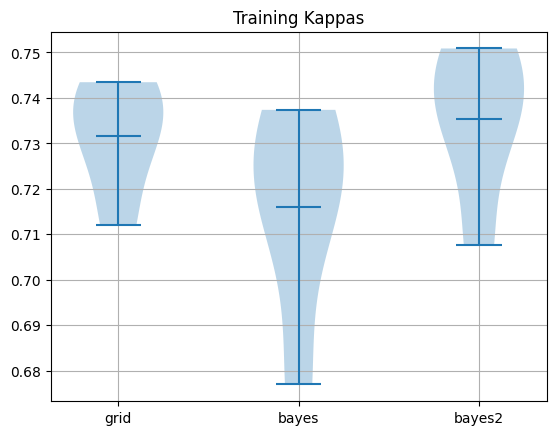

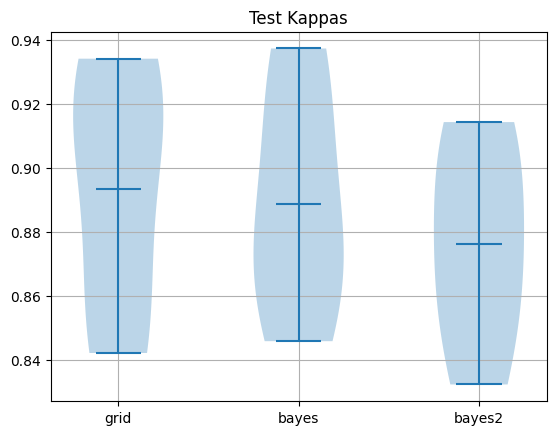

In [3]:
plt.violinplot(dataset=[kappas for mode, kappas in kappas_train.items()], showmeans=True)
plt.title('Training Kappas')
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.grid()
plt.show()
plt.violinplot(
dataset=[kappas for mode, kappas in kappas_test.items()], showmeans=True)
plt.title('Test Kappas')
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.grid()
plt.show()

In [2]:
# classical bayes vs grid:
kappas_train = {'grid': [], 'bayes': [], 'bayes2': []}
kappas_test = {'grid': [], 'bayes': [], 'bayes2': []}
N = 5
# file_name = 'Polaris/pgp-broccatelli.parquet'
file_name = 'Polaris/bbb-martins.parquet'
# file_name = 'Polaris/ncats-solubility.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)
for i in tqdm(range(N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    param_grid = {'C': [1,10,100], 'gamma':[n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]], 'slice_size': [44,59,88,177], 'adjust_outer_bias': [False, True]}
    search_space = {
        'C': sks.Categorical([1,10,100]),
        'gamma': sks.Categorical([n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]]),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_space2 = {
        'C': sks.Real(1,100, prior='log-uniform'),
        'gamma': sks.Real(0.1 * default_gamma, 5 * default_gamma),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_size = svm.estimate_search_space_size(search_space, samples_per_real_interval=5)[0]
    limit = round(svm.samples_per_size(search_size))
    search_size2 = svm.estimate_search_space_size(search_space2, samples_per_real_interval=5)[0]
    limit2 = round(svm.samples_per_size(search_size2))
    inner_estimator = skl.svm.SVC()
    estimator=svm.slice_estimator(estimator=inner_estimator, force_unbiased=True, seed=0, print_info=False)
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit, mode='grid', filter=None, print_info=1, seed=0)
    kappas_train['grid'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['grid'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space2, vectors, labels, folds=5, limit=limit2, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes2'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes2'] += [svm.kappa(f(vectors), labels)]

  0%|          | 0/5 [00:00<?, ?it/s]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1001 (767 positive, 234 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
   adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
5               True  100  0.000977         177    0.605208   0.028438
7               True   10  0.000488         177    0.603579   0.028000
6              False   10  0.000244         177    0.562204   0.016630
0               True  100  0.001953          88    0.553322   0.054288
3               True  100  0.000098          44    0.551209   0.035140
Iteration 14/24: New best score found
Iteration 18/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
17               True   10  0.000098         177    0.615559   0.038682
18               True   10  0.000244         177    0.590687   0.030416
13               True   10  0.001465         177    0.590

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 59] before, using random point [True, 16.663921507976937, 0.00434300306500602, 88]
  warnings.warn(


    adjust_outer_bias      C     gamma  slice_size  mean kappa  std kappa
11               True  100.0  0.000098          59    0.562379   0.033980
15               True  100.0  0.000098          88    0.560466   0.045642
10               True  100.0  0.001985          88    0.558602   0.058956
12               True  100.0  0.001675          88    0.553563   0.050515
14               True  100.0  0.000490          88    0.549238   0.049480


 20%|██        | 1/5 [07:32<30:09, 452.27s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1001 (772 positive, 229 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
7                True   10  0.000488         177    0.576201   0.060155
5                True  100  0.000977         177    0.545901   0.059483
3                True  100  0.000098          44    0.536542   0.045088
22               True  100  0.000732          88    0.522794   0.045896
11               True  100  0.000488          44    0.505522   0.046058
Iteration 3/24: New best score found
Iteration 7/24: New best score found
Iteration 12/24: New best score found
Iteration 20/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
19               True  100  0.000488         177    0.576392   0.060239
11               True   10  0.000488         177 

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999998e-05, 44] before, using random point [True, 16.663921507976937, 0.004343003065006022, 88]
  warnings.warn(


    adjust_outer_bias           C     gamma  slice_size  mean kappa  std kappa
16               True  100.000000  0.000098          44    0.536542   0.045088
18               True    5.717365  0.000098          44    0.527280   0.054283
19               True  100.000000  0.000098          88    0.523652   0.037682
15              False  100.000000  0.000098          44    0.504814   0.048480
13              False   57.089755  0.000098          44    0.504814   0.048480


 40%|████      | 2/5 [15:16<22:57, 459.29s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1001 (776 positive, 225 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
7                True   10  0.000488         177    0.624833   0.042962
5                True  100  0.000977         177    0.618554   0.055527
20              False   10  0.000098          88    0.562923   0.055178
8               False   10  0.000098          88    0.562923   0.055178
22               True  100  0.000732          88    0.560906   0.032695
Iteration 7/24: New best score found
Iteration 10/24: New best score found
Iteration 14/24: New best score found
Iteration 16/24: New best score found
Iteration 23/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
22               True  100  0.000488         177    0.628674   0.041542
15        

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 10.830209479116924, 0.0037408393429227403, 44]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [True, 5.96195566986082, 0.0013053165333394407, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 10.311238646309858, 0.003943819802089213, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 1.0526645307594045, 0.003485575008684829, 59]
  warnings.warn(


    adjust_outer_bias      C     gamma  slice_size  mean kappa  std kappa
11               True  100.0  0.000098          88    0.617404   0.038851
17               True  100.0  0.000335          88    0.583643   0.036137
14              False  100.0  0.000098          88    0.555319   0.035876
13               True  100.0  0.000098          44    0.548052   0.017542
12               True    1.0  0.000098          88    0.520027   0.034943


 60%|██████    | 3/5 [22:38<15:03, 451.55s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1001 (771 positive, 230 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
20              False   10  0.000098          88    0.607657   0.080341
8               False   10  0.000098          88    0.607657   0.080341
7                True   10  0.000488         177    0.598276   0.059554
5                True  100  0.000977         177    0.596694   0.076978
6               False   10  0.000244         177    0.585270   0.079888
Iteration 10/24: New best score found
Iteration 12/24: New best score found
Iteration 22/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
21               True   10  0.000244         177    0.603870   0.036889
12               True  100  0.000488         177    0.598276   0.059554
11           

 80%|████████  | 4/5 [29:56<07:26, 446.04s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1001 (782 positive, 219 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
7                True   10  0.000488         177    0.619680   0.045108
5                True  100  0.000977         177    0.617877   0.053015
3                True  100  0.000098          44    0.590262   0.052116
8               False   10  0.000098          88    0.585250   0.051416
20              False   10  0.000098          88    0.585250   0.051416
Iteration 7/24: New best score found
Iteration 11/24: New best score found
Iteration 17/24: New best score found
Iteration 22/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
21               True  100  0.000732         177    0.625055   0.051191
17               True   10  0.000488         177

100%|██████████| 5/5 [37:21<00:00, 448.25s/it]


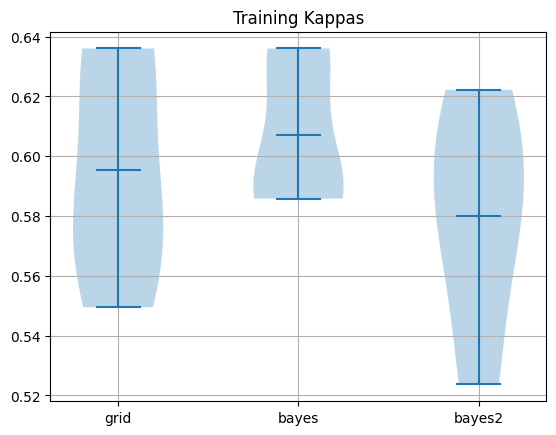

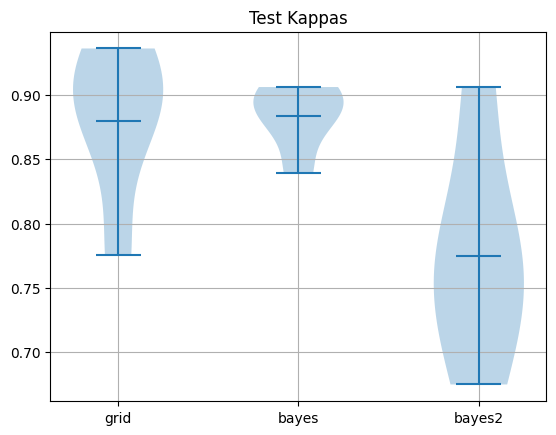

In [3]:
plt.violinplot(dataset=[kappas for mode, kappas in kappas_train.items()],showmeans=True)
plt.title('Training Kappas')
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.grid()
plt.show()
plt.violinplot(dataset=[kappas for mode, kappas in kappas_test.items()],showmeans=True)
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.title('Test Kappas')
plt.grid()
plt.show()

In [4]:
# classical bayes vs grid second round with higher limits::
kappas_train = {'grid': [], 'bayes': [], 'bayes2': []}
kappas_test = {'grid': [], 'bayes': [], 'bayes2': []}
N = 5
# file_name = 'Polaris/pgp-broccatelli.parquet'
file_name = 'Polaris/bbb-martins.parquet'
# file_name = 'Polaris/ncats-solubility.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)
for i in tqdm(range(N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    param_grid = {'C': [1,10,100], 'gamma':[n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]], 'slice_size': [44,59,88,177], 'adjust_outer_bias': [False, True]}
    search_space = {
        'C': sks.Categorical([1,10,100]),
        'gamma': sks.Categorical([n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]]),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_space2 = {
        'C': sks.Real(1,100, prior='log-uniform'),
        'gamma': sks.Real(0.1 * default_gamma, 5 * default_gamma),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_size = svm.estimate_search_space_size(search_space, samples_per_real_interval=7)[0]
    limit = round(svm.samples_per_size(search_size))
    search_size2 = svm.estimate_search_space_size(search_space2, samples_per_real_interval=7)[0]
    limit2 = round(svm.samples_per_size(search_size2))
    inner_estimator = skl.svm.SVC()
    estimator=svm.slice_estimator(estimator=inner_estimator, force_unbiased=True, seed=0, print_info=False)
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit2, mode='grid', filter=None, print_info=1, seed=0)
    kappas_train['grid'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['grid'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit2, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space2, vectors, labels, folds=5, limit=limit2, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes2'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes2'] += [svm.kappa(f(vectors), labels)]

  0%|          | 0/5 [00:00<?, ?it/s]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1001 (767 positive, 234 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
5                True  100  0.000977         177    0.605208   0.028438
7                True   10  0.000488         177    0.603579   0.028000
37               True  100  0.000244         177    0.594613   0.039785
36               True  100  0.000244         177    0.594613   0.039785
35               True   10  0.000977         177    0.591085   0.035110
Iteration 14/39: New best score found
Iteration 18/39: New best score found


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 10, 9.765624999999994e-05, 177] before, using random point [True, 10, 0.0048828124999999965, 177]
  warnings.warn(


    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
17               True   10  0.000098         177    0.615559   0.038682
30               True   10  0.000488         177    0.603579   0.028000
31               True  100  0.000488         177    0.599618   0.026819
18               True   10  0.000244         177    0.590687   0.030416
13               True   10  0.001465         177    0.590224   0.037208
Iteration 3/39: New best score found
Iteration 7/39: New best score found
Iteration 11/39: New best score found
Iteration 12/39: New best score found


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 59] before, using random point [True, 16.663921507976937, 0.00434300306500602, 88]
  warnings.warn(


Iteration 23/39: New best score found
Iteration 24/39: New best score found
Iteration 36/39: New best score found
    adjust_outer_bias      C     gamma  slice_size  mean kappa  std kappa
35               True  100.0  0.000950         177    0.604205   0.023161
23               True  100.0  0.001214         177    0.603243   0.039818
36               True  100.0  0.000792         177    0.602761   0.024940
37               True  100.0  0.000991         177    0.598359   0.043188
33               True  100.0  0.001001         177    0.598359   0.043188


 20%|██        | 1/5 [22:37<1:30:29, 1357.30s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1001 (772 positive, 229 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
7                True   10  0.000488         177    0.576201   0.060155
5                True  100  0.000977         177    0.545901   0.059483
35               True   10  0.000977         177    0.545901   0.059483
37               True  100  0.000244         177    0.541106   0.041303
36               True  100  0.000244         177    0.541106   0.041303
Iteration 3/39: New best score found
Iteration 7/39: New best score found
Iteration 12/39: New best score found
Iteration 20/39: New best score found


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 10, 0.0004882812499999999, 177] before, using random point [True, 1, 0.0007324218749999998, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 10, 0.0004882812499999999, 177] before, using random point [True, 10, 0.004882812499999999, 177]
  warnings.warn(


    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
19               True  100  0.000488         177    0.576392   0.060239
11               True   10  0.000488         177    0.576201   0.060155
33               True   10  0.000732         177    0.574122   0.062029
27               True  100  0.000732         177    0.574122   0.062029
22               True   10  0.000244         177    0.566272   0.050212
Iteration 3/39: New best score found
Iteration 13/39: New best score found
Iteration 14/39: New best score found
Iteration 17/39: New best score found


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999998e-05, 44] before, using random point [True, 16.663921507976937, 0.004343003065006022, 88]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999998e-05, 44] before, using random point [True, 93.77733307369746, 0.002378692106436146, 59]
  warnings.warn(


Iteration 23/39: New best score found
Iteration 27/39: New best score found
Iteration 32/39: New best score found
Iteration 34/39: New best score found
    adjust_outer_bias      C     gamma  slice_size  mean kappa  std kappa
33               True  100.0  0.000212          59    0.547197   0.055630
31               True  100.0  0.000098          59    0.546688   0.037195
35               True  100.0  0.000466          59    0.545841   0.037482
26               True  100.0  0.000236          44    0.543718   0.053963
29               True  100.0  0.000236          44    0.543718   0.053963


 40%|████      | 2/5 [38:51<56:36, 1132.07s/it]  

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1001 (776 positive, 225 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
7                True   10  0.000488         177    0.624833   0.042962
5                True  100  0.000977         177    0.618554   0.055527
35               True   10  0.000977         177    0.618554   0.055527
37               True  100  0.000244         177    0.589736   0.034566
36               True  100  0.000244         177    0.589736   0.034566
Iteration 7/39: New best score found
Iteration 10/39: New best score found
Iteration 14/39: New best score found
Iteration 16/39: New best score found
Iteration 23/39: New best score found
Iteration 26/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
25               True   10  0.000098        

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 10.830209479116924, 0.0037408393429227403, 44]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [True, 5.96195566986082, 0.0013053165333394407, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 10.311238646309858, 0.003943819802089213, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 1.0526645307594045, 0.003485575008684829, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [True, 93.77733307369746, 0.0023786921064361446, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [True, 5.686094086255932, 0.0013289760707805005, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 2.581620066577597, 0.0004888551154454442, 44]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 52.98946119114567, 0.0031699549902709586, 88]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 5.939172045799051, 0.004232717770064375, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 11.957888636891711, 0.0009715496656410154, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 2.617537717947638, 0.004800551405153248, 44]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 3.928074518584005, 0.001062612460302629, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [True, 3.92257161318923, 0.0020021432013769963, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 32.231201448157925, 0.0024146073859461067, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 6.692837784515528, 0.0020916069828214377, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [False, 62.316794135190825, 0.001782220309961808, 44]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [True, 11.396176107272069, 0.004576862681145976, 177]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [True, 20.825852998007065, 0.004512552039849232, 177]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 88] before, using random point [True, 19.065888290632486, 0.0005574307028960357, 59]
  warnings.warn(


    adjust_outer_bias          C     gamma  slice_size  mean kappa  std kappa
29               True   79.90937  0.000098          88    0.617404   0.038851
11               True  100.00000  0.000098          88    0.617404   0.038851
25               True  100.00000  0.000098         177    0.601473   0.021285
17               True  100.00000  0.000335          88    0.583643   0.036137
21               True  100.00000  0.000098          59    0.556248   0.036228


 60%|██████    | 3/5 [54:11<34:29, 1034.97s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1001 (771 positive, 230 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
37               True  100  0.000244         177    0.610897   0.061922
36               True  100  0.000244         177    0.610897   0.061922
8               False   10  0.000098          88    0.607657   0.080341
20              False   10  0.000098          88    0.607657   0.080341
7                True   10  0.000488         177    0.598276   0.059554
Iteration 10/39: New best score found
Iteration 12/39: New best score found
Iteration 22/39: New best score found
Iteration 25/39: New best score found
Iteration 39/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
38               True  100  0.000732         177    0.625347   0.067417
24       

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765624999999992e-05, 88] before, using random point [True, 93.77733307369746, 0.002378692106436144, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765624999999992e-05, 88] before, using random point [False, 1.119033744401426, 0.0006023330862743544, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765624999999992e-05, 88] before, using random point [False, 11.957888636891711, 0.0009715496656410151, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 100.0, 9.765624999999992e-05, 88] before, using random point [False, 8.112605400908162, 0.000811605523660481, 177]
  warnings.warn(


    adjust_outer_bias           C     gamma  slice_size  mean kappa  std kappa
33              False   54.791619  0.000098          88    0.618759   0.064918
17              False  100.000000  0.000098          88    0.618759   0.064918
30              False   32.843115  0.000098          88    0.615515   0.081076
26              False  100.000000  0.000146          88    0.608627   0.070795
11               True  100.000000  0.000098          88    0.597727   0.072897


 80%|████████  | 4/5 [1:09:44<16:34, 994.73s/it]

Data size: 2030 (1551 positive, 479 negative)
27 vectors removed due to inconsistently labelled degeneracies
Training data size: 1001 (782 positive, 219 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
7                True   10  0.000488         177    0.619680   0.045108
5                True  100  0.000977         177    0.617877   0.053015
35               True   10  0.000977         177    0.617877   0.053015
37               True  100  0.000244         177    0.596458   0.027098
36               True  100  0.000244         177    0.596458   0.027098
Iteration 7/39: New best score found
Iteration 11/39: New best score found
Iteration 17/39: New best score found
Iteration 22/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
25               True   10  0.000732         177    0.625055   0.051191
21               True  100  0.000732         177

100%|██████████| 5/5 [1:25:27<00:00, 1025.49s/it]


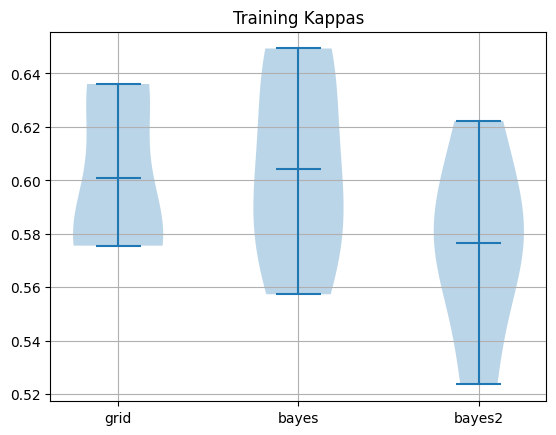

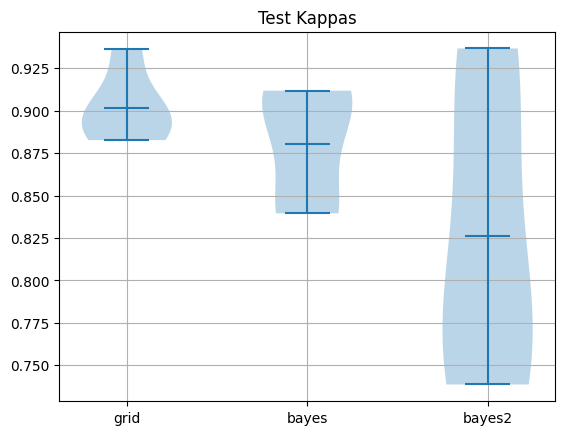

In [5]:
plt.violinplot(dataset=[kappas for mode, kappas in kappas_train.items()],showmeans=True)
plt.title('Training Kappas')
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.grid()
plt.show()
plt.violinplot(dataset=[kappas for mode, kappas in kappas_test.items()],showmeans=True)
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.title('Test Kappas')
plt.grid()
plt.show()

In [4]:
# classical bayes vs grid:
kappas_train = {'grid': [], 'bayes': [], 'bayes2': []}
kappas_test = {'grid': [], 'bayes': [], 'bayes2': []}
N = 5
# file_name = 'Polaris/pgp-broccatelli.parquet'
# file_name = 'Polaris/bbb-martins.parquet'
file_name = 'Polaris/ncats-solubility.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)
for i in tqdm(range(N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    param_grid = {'C': [1,10,100], 'gamma':[n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]], 'slice_size': [44,59,88,177], 'adjust_outer_bias': [False, True]}
    search_space = {
        'C': sks.Categorical([1,10,100]),
        'gamma': sks.Categorical([n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]]),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_space2 = {
        'C': sks.Real(1,100, prior='log-uniform'),
        'gamma': sks.Real(0.1 * default_gamma, 5 * default_gamma),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_size = svm.estimate_search_space_size(search_space, samples_per_real_interval=5)[0]
    limit = round(svm.samples_per_size(search_size))
    search_size2 = svm.estimate_search_space_size(search_space2, samples_per_real_interval=5)[0]
    limit2 = round(svm.samples_per_size(search_size2))
    inner_estimator = skl.svm.SVC()
    estimator=svm.slice_estimator(estimator=inner_estimator, force_unbiased=False, seed=0, print_info=False)
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit, mode='grid', filter=None, print_info=1, seed=0)
    kappas_train['grid'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['grid'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space2, vectors, labels, folds=5, limit=limit2, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes2'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes2'] += [svm.kappa(f(vectors), labels)]

  0%|          | 0/5 [00:00<?, ?it/s]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (523 positive, 703 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
5                True  100  0.000977         177    0.384446   0.055102
7                True   10  0.000488         177    0.383634   0.050447
14               True    1  0.000977          44    0.374947   0.049567
22               True  100  0.000732          88    0.371724   0.054147
13               True    1  0.000488          44    0.371187   0.072236
Iteration 3/24: New best score found
Iteration 19/24: New best score found
Iteration 22/24: New best score found
Iteration 24/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
23               True    1  0.000488         177    0.399637   0.053666
21               True    1  0.000098         177

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 44] before, using random point [False, 3.890217488400119, 0.0021510835623714587, 59]
  warnings.warn(


Iteration 15/20: New best score found
Iteration 18/20: New best score found
    adjust_outer_bias           C     gamma  slice_size  mean kappa  std kappa
17               True    1.000000  0.000563         177    0.408941   0.049095
14               True    6.457475  0.000098         177    0.402769   0.038821
16               True    2.684871  0.000098         177    0.389158   0.052233
18               True    1.000000  0.000098          59    0.379575   0.066237
15               True  100.000000  0.000098         177    0.377268   0.071861


 20%|██        | 1/5 [05:36<22:27, 336.89s/it]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (511 positive, 715 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
5                True  100  0.000977         177    0.383610   0.068951
3                True  100  0.000098          44    0.376161   0.030028
11               True  100  0.000488          44    0.375265   0.044871
7                True   10  0.000488         177    0.364643   0.059223
21               True    1  0.001465          44    0.363421   0.054352
Iteration 3/24: New best score found
Iteration 7/24: New best score found
Iteration 12/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
11               True  100  0.001465          44    0.390185   0.060574
23               True  100  0.000488          88    0.379227   0.053054
17             

 40%|████      | 2/5 [11:29<17:18, 346.26s/it]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (509 positive, 717 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
7                True   10  0.000488         177    0.342038   0.040954
5                True  100  0.000977         177    0.337660   0.038182
11               True  100  0.000488          44    0.318343   0.023840
22               True  100  0.000732          88    0.318025   0.038628
14               True    1  0.000977          44    0.317020   0.067173
Iteration 3/24: New best score found
Iteration 7/24: New best score found
Iteration 13/24: New best score found
Iteration 19/24: New best score found
Iteration 20/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
19               True   10  0.000244         177    0.353663   0.043262
18         

 60%|██████    | 3/5 [17:24<11:40, 350.28s/it]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (542 positive, 684 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
7                True   10  0.000488         177    0.411062   0.026970
5                True  100  0.000977         177    0.400672   0.050046
22               True  100  0.000732          88    0.400023   0.042374
14               True    1  0.000977          44    0.392995   0.029696
11               True  100  0.000488          44    0.391608   0.032164
Iteration 3/24: New best score found
Iteration 7/24: New best score found
Iteration 15/24: New best score found
Iteration 16/24: New best score found
Iteration 17/24: New best score found
Iteration 22/24: New best score found
Iteration 23/24: New best score found
    adjust_outer_bias   C     gamma  slice_size  mean kappa  std kappa
22      

 80%|████████  | 4/5 [23:31<05:56, 356.80s/it]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (514 positive, 712 negative)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
5                True  100  0.000977         177    0.433596   0.059108
7                True   10  0.000488         177    0.419923   0.049705
22               True  100  0.000732          88    0.415386   0.063367
3                True  100  0.000098          44    0.405953   0.085059
11               True  100  0.000488          44    0.405025   0.080753
Iteration 3/24: New best score found
Iteration 7/24: New best score found
Iteration 13/24: New best score found
Iteration 14/24: New best score found
Iteration 21/24: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
20               True   10  0.000488         177    0.419923   0.049705
13         

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765625000000003e-05, 59] before, using random point [False, 10.311238646309858, 0.0039438198020892165, 59]
  warnings.warn(


    adjust_outer_bias      C     gamma  slice_size  mean kappa  std kappa
16               True  100.0  0.000098          59    0.397480   0.053815
17               True  100.0  0.000098          88    0.391655   0.061462
10               True    1.0  0.000920          88    0.384261   0.039842
15               True    1.0  0.001428         177    0.374708   0.083436
11               True    1.0  0.000223         177    0.368044   0.070422


100%|██████████| 5/5 [29:58<00:00, 359.74s/it]


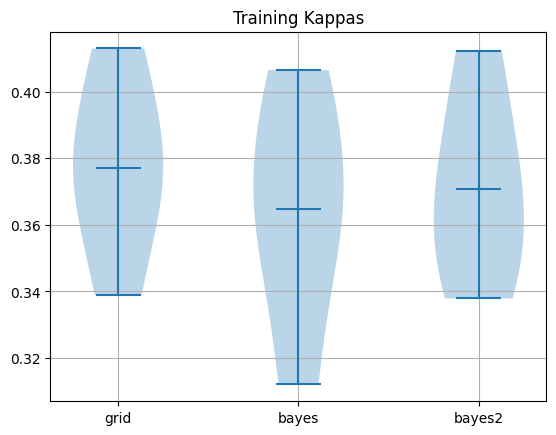

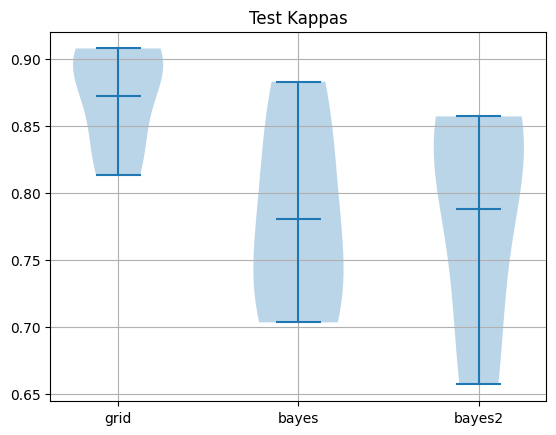

In [5]:
plt.violinplot(dataset=[kappas for mode, kappas in kappas_train.items()], showmeans=True)
plt.title('Training Kappas')
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.grid()
plt.show()
plt.violinplot(dataset=[kappas for mode, kappas in kappas_test.items()], showmeans=True)
plt.title('Test Kappas')
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.grid()
plt.show()

In [4]:
file_name = 'Polaris/ncats-solubility.parquet'
#file_name = 'Polaris/pgp-broccatelli.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)
vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=20, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=0, normalize_data=True, print_info=True)
default_gamma = 1 / (vectors.shape[1] * vectors.var())
#param_grid = {'C': [1,10,100], 'gamma': [n*default_gamma for n in [0.1,0.2,0.3,0.5,0.75,1,1.5,2]]}
param_grid = {'base': [2,10], 'num_encoding':[1,2,3,4], 'kernel': [n*default_gamma for n in [0.05,0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]], 'penalty':[0,0.1,0.25,0.5,0.75,1,2,3], 'slice_size': [44,59,88]}
filter = lambda base, num_encoding, kernel, penalty, slice_size: num_encoding * slice_size <= 177
# search_space = {
#     'C': sks.Real(0.1, 10, prior='log-uniform', transform='identity'),
#     'gamma': sks.Real(0.01, 10)
# }
search_space = {
    'base': sks.Categorical([2,10]),
    'num_encoding': sks.Integer(1,4),
    'kernel': sks.Real(0.05*default_gamma,5*default_gamma),
    'penalty': sks.Real(0,3),
    'slice_size': sks.Categorical([44,59,88])
}
inner_estimator = svm.qSVM_estimator(solver='SA', adjust_bias=True)
estimator = svm.slice_estimator(estimator=inner_estimator, force_unbiased=False, seed=0)

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 490 (209 positive, 281 negative)


In [6]:
# classical bayes vs grid second round with higher limits::
kappas_train = {'grid': [], 'bayes': [], 'bayes2': []}
kappas_test = {'grid': [], 'bayes': [], 'bayes2': []}
N = 5
# file_name = 'Polaris/pgp-broccatelli.parquet'
# file_name = 'Polaris/bbb-martins.parquet'
file_name = 'Polaris/ncats-solubility.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)
for i in tqdm(range(N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    param_grid = {'C': [1,10,100], 'gamma':[n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]], 'slice_size': [44,59,88,177], 'adjust_outer_bias': [False, True]}
    search_space = {
        'C': sks.Categorical([1,10,100]),
        'gamma': sks.Categorical([n*default_gamma for n in [0.1,0.25,0.5,0.75,1,1.5,2,3,4,5]]),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_space2 = {
        'C': sks.Real(1,100, prior='log-uniform'),
        'gamma': sks.Real(0.1 * default_gamma, 5 * default_gamma),
        'slice_size': sks.Categorical([44,59,88,177]),
        'adjust_outer_bias': sks.Categorical([False,True])
    }
    search_size = svm.estimate_search_space_size(search_space, samples_per_real_interval=7)[0]
    limit = round(svm.samples_per_size(search_size))
    search_size2 = svm.estimate_search_space_size(search_space2, samples_per_real_interval=7)[0]
    limit2 = round(svm.samples_per_size(search_size2))
    inner_estimator = skl.svm.SVC()
    estimator=svm.slice_estimator(estimator=inner_estimator, force_unbiased=False, seed=0, print_info=False)
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit2, mode='grid', filter=None, print_info=1, seed=0)
    kappas_train['grid'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['grid'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space, vectors, labels, folds=5, limit=limit2, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes'] += [svm.kappa(f(vectors), labels)]
    f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space2, vectors, labels, folds=5, limit=limit2, mode='bayes', filter=None, print_info='f', seed=0)
    kappas_train['bayes2'] += [svm.kappa(f(test_vectors), test_labels)]
    kappas_test['bayes2'] += [svm.kappa(f(vectors), labels)]

  0%|          | 0/5 [00:00<?, ?it/s]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (523 positive, 703 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
5                True  100  0.000977         177    0.384446   0.055102
35               True   10  0.000977         177    0.384446   0.055102
7                True   10  0.000488         177    0.383634   0.050447
14               True    1  0.000977          44    0.374947   0.049567
22               True  100  0.000732          88    0.371724   0.054147
Iteration 3/39: New best score found
Iteration 19/39: New best score found
Iteration 22/39: New best score found
Iteration 24/39: New best score found
Iteration 28/39: New best score found


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 1, 0.0004882812499999997, 177] before, using random point [True, 100, 0.0048828124999999965, 59]
  warnings.warn(


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 1, 0.0004882812499999997, 177] before, using random point [False, 100, 0.0039062499999999974, 59]
  warnings.warn(


Iteration 31/39: New best score found
    adjust_outer_bias   C     gamma  slice_size  mean kappa  std kappa
30               True   1  0.000977         177    0.411110   0.050376
27               True   1  0.000732         177    0.410486   0.040864
23               True   1  0.000488         177    0.399637   0.053666
33               True   1  0.001465         177    0.393168   0.060966
24               True  10  0.000098         177    0.389289   0.039691
Iteration 3/39: New best score found
Iteration 11/39: New best score found


C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765624999999994e-05, 44] before, using random point [False, 3.890217488400119, 0.0021510835623714587, 59]
  warnings.warn(


Iteration 15/39: New best score found
Iteration 18/39: New best score found
    adjust_outer_bias           C     gamma  slice_size  mean kappa  std kappa
17               True    1.000000  0.000563         177    0.408941   0.049095
14               True    6.457475  0.000098         177    0.402769   0.038821
16               True    2.684871  0.000098         177    0.389158   0.052233
18               True    1.000000  0.000098          59    0.379575   0.066237
15               True  100.000000  0.000098         177    0.377268   0.071861


 20%|██        | 1/5 [12:31<50:05, 751.40s/it]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (511 positive, 715 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
5                True  100  0.000977         177    0.383610   0.068951
35               True   10  0.000977         177    0.383610   0.068951
3                True  100  0.000098          44    0.376161   0.030028
11               True  100  0.000488          44    0.375265   0.044871
37               True  100  0.000244         177    0.370475   0.074809
Iteration 3/39: New best score found
Iteration 7/39: New best score found
Iteration 12/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
34               True   10  0.001465          44    0.390185   0.060574
11               True  100  0.001465          44    0.390185   0.060574
23             

 40%|████      | 2/5 [24:55<37:20, 746.97s/it]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (509 positive, 717 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
7                True   10  0.000488         177    0.342038   0.040954
5                True  100  0.000977         177    0.337660   0.038182
35               True   10  0.000977         177    0.337660   0.038182
37               True  100  0.000244         177    0.329076   0.050749
36               True  100  0.000244         177    0.329076   0.050749
Iteration 3/39: New best score found
Iteration 7/39: New best score found
Iteration 13/39: New best score found
Iteration 19/39: New best score found
Iteration 20/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
19               True   10  0.000244         177    0.353663   0.043262
18         

 60%|██████    | 3/5 [37:27<24:58, 749.40s/it]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (542 positive, 684 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
7                True   10  0.000488         177    0.411062   0.026970
37               True  100  0.000244         177    0.406305   0.022389
36               True  100  0.000244         177    0.406305   0.022389
5                True  100  0.000977         177    0.400672   0.050046
35               True   10  0.000977         177    0.400672   0.050046
Iteration 3/39: New best score found
Iteration 7/39: New best score found
Iteration 15/39: New best score found
Iteration 16/39: New best score found
Iteration 17/39: New best score found
Iteration 22/39: New best score found
Iteration 23/39: New best score found
Iteration 38/39: New best score found
    adjust_outer_bias   C     gamma  slic

 80%|████████  | 4/5 [49:55<12:28, 748.93s/it]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (514 positive, 712 negative)
Fitting 5 folds for each of 39 candidates, totalling 195 fits
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
5                True  100  0.000977         177    0.433596   0.059108
35               True   10  0.000977         177    0.433596   0.059108
7                True   10  0.000488         177    0.419923   0.049705
22               True  100  0.000732          88    0.415386   0.063367
3                True  100  0.000098          44    0.405953   0.085059
Iteration 3/39: New best score found
Iteration 7/39: New best score found
Iteration 13/39: New best score found
Iteration 14/39: New best score found
Iteration 21/39: New best score found
Iteration 26/39: New best score found
    adjust_outer_bias    C     gamma  slice_size  mean kappa  std kappa
38               True  100  0.000977         

C:\Users\oszal\AppData\Roaming\Python\Python39\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [True, 100.0, 9.765625000000003e-05, 59] before, using random point [False, 10.311238646309858, 0.0039438198020892165, 59]
  warnings.warn(


Iteration 21/39: New best score found
Iteration 26/39: New best score found
Iteration 33/39: New best score found
Iteration 36/39: New best score found
    adjust_outer_bias      C     gamma  slice_size  mean kappa  std kappa
35               True  100.0  0.000807         177    0.441424   0.051452
32               True  100.0  0.000790         177    0.435135   0.066231
25               True  100.0  0.000734         177    0.431604   0.052300
20               True  100.0  0.000582         177    0.429510   0.055386
34               True  100.0  0.000782         177    0.429378   0.067370


100%|██████████| 5/5 [1:02:44<00:00, 752.81s/it]


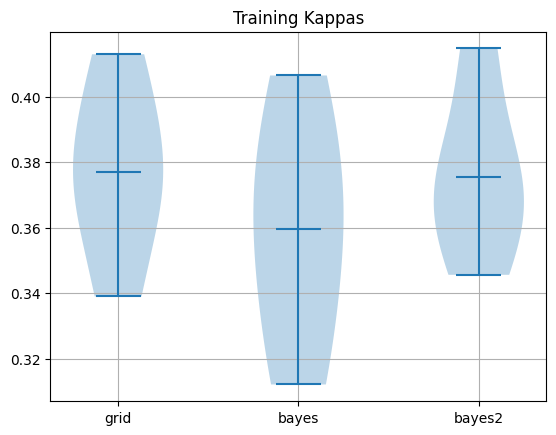

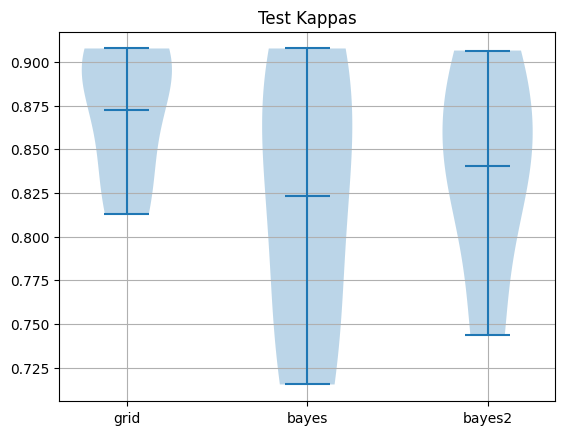

In [7]:
plt.violinplot(dataset=[kappas for mode, kappas in kappas_train.items()], showmeans=True)
plt.title('Training Kappas')
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.grid()
plt.show()
plt.violinplot(dataset=[kappas for mode, kappas in kappas_test.items()], showmeans=True)
plt.title('Test Kappas')
plt.xticks(range(1,4), labels=kappas_train.keys())
plt.grid()
plt.show()

In [5]:
decision_function, param_tables, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space=search_space, vectors=vectors, labels=labels, folds=4, limit=50, filter=True, mode='bayes', seed=0, print_info='plot')

[{'sliced__estimator__base': Categorical(categories=(2, 10), prior=None), 'sliced__estimator__penalty': Real(low=0, high=3, prior='uniform', transform='identity'), 'sliced__estimator__num_encoding': Integer(low=1, high=2, prior='uniform', transform='identity'), 'sliced__estimator__kernel': Real(low=4.8875855327468224e-05, high=0.004887585532746822, prior='uniform', transform='identity')}]


KeyboardInterrupt: 

In [6]:
decision_function, param_tables, opt, optimal_params = svm.hyperparameter_optimization(estimator, search_space=search_space, vectors=vectors, labels=labels, folds=4, limit=50, filter=True, mode='bayes', seed=0, print_info=0)
display(param_tables)

Iteration 3: New best score found
Iteration 10: New best score found
Iteration 2: New best score found
Iteration 3: New best score found
Iteration 8: New best score found
Iteration 16: New best score found
Iteration 4: New best score found
Iteration 8: New best score found


,base,kernel,num_encoding,penalty,slice_size,mean kappa,std kappa
37,10,0.000473,3,2.570241,59,0.244884,0.120388
29,10,0.000476,2,2.497538,59,0.229752,0.133412
9,10,0.000116,3,1.487118,44,0.227966,0.111820
38,10,0.000559,3,2.887119,59,0.223779,0.123335
34,10,0.000559,2,2.334328,59,0.219689,0.064806
46,10,0.000445,2,0.780752,88,0.210973,0.090515
21,10,0.000049,3,1.212930,44,0.206040,0.057642
14,10,0.000049,3,1.662791,44,0.199483,0.093312
18,10,0.000049,4,0.733054,44,0.195056,0.100352
15,10,0.000049,4,1.618915,44,0.187311,0.083515


In [7]:
f, param_table, grid_search, optimal_params = svm.hyperparameter_optimization(estimator=estimator, search_space=param_grid, vectors=vectors, labels=labels, folds=4, limit=50, filter=filter, mode='grid', print_info=2, seed=0)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV] END sliced__estimator__base=10, sliced__estimator__kernel=0.0014662756598240465, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.25, sliced__slice_size=88; total time=   3.0s
[CV] END sliced__estimator__base=10, sliced__estimator__kernel=0.0014662756598240465, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.25, sliced__slice_size=88; total time=   2.8s
[CV] END sliced__estimator__base=10, sliced__estimator__kernel=0.0014662756598240465, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.25, sliced__slice_size=88; total time=   3.0s
[CV] END sliced__estimator__base=10, sliced__estimator__kernel=0.0014662756598240465, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0.25, sliced__slice_size=88; total time=   3.0s
[CV] END sliced__estimator__base=10, sliced__estimator__kernel=0.004887585532746822, sliced__estimator__num_encoding=1, sliced__estimator__penalty=0, slic

In [8]:
print(svm.kappa(decision_function(vectors), labels), svm.kappa(f(vectors), labels))
print(svm.kappa(decision_function(test_vectors), test_labels), svm.kappa(f(test_vectors), test_labels))

0.7605986319921828 1.0
0.31185034109290377 0.26281796286786774


In [2]:
file_name = 'Polaris/pgp-broccatelli.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)
slice_size = int(177/2)


vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=0, normalize_data=True, print_info=True)
default_gamma = 1 / (vectors.shape[1] * vectors.var())
search_space = {'base': sks.Categorical([2,10,100]), 'num_encoding': sks.Integer(1,2), 'kernel': sks.Real(0.1 * default_gamma, 3 * default_gamma), 'penalty': sks.Real(0,3)}
limit = 12
inner_estimator = svm.qSVM_estimator(solver='SA', adjust_bias=True)
estimator = svm.slice_estimator(estimator=inner_estimator, slice_size=slice_size, force_unbiased=False, adjust_outer_bias=False, seed=0)
f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator=estimator, search_space=search_space, vectors=vectors, labels=labels, folds=4, filter=True, seed=0, mode='bayes', limit=None, print_info='d')

Data size: 1218 (650 positive, 568 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 609 (330 positive, 279 negative)
Iteration 3/29: New best score found
Iteration 5/29: New best score found
Iteration 11/29: New best score found
Iteration 13/29: New best score found
Iteration 14/29: New best score found
Iteration 15/29: New best score found
Iteration 20/29: New best score found
Iteration 22/29: New best score found


AttributeError: 'DataFrame' object has no attribute 'map'

In [ ]:
limit = 12
filter = True
scoring = {'accuracy': 'accuracy', 'kappa': skl.metrics.make_scorer(skl.metrics.cohen_kappa_score)}
pipeline, searchspace, limit = svm.prepare_pipeline(estimator, search_space, limit, filter, 'bayes', 0)
# run parameter search with cross validation:
opt = skopt.BayesSearchCV(pipeline, searchspace, scoring=scoring, cv=3, n_iter=limit, refit='kappa', verbose=3, random_state=0, return_train_score=True)
def update_best_score(result):
    iteration = len(result.x_iters)
    score = result.fun
    global best_score
    if iteration == 1 or best_score is None:
        best_score = score
    elif score < best_score:
        best_score = score
        print('Iteration {}/{}: New best score found'.format(iteration, limit))
    else:
        print('Iteration {}/{}'.format(iteration, limit), end="\r")
opt.fit(vectors, labels, callback = [update_best_score])

In [20]:
def plot_kappas_per_params(slice_study_results):
    def auto_round(arr):
        arr_range = np.max(arr) - np.min(arr)
        if arr_range == 0:
            return np.round(arr, 3)  # Default to 3 decimals if all values are the same
        order_of_magnitude = np.floor(np.log10(arr_range))
        decimal_places = int(max(3, -order_of_magnitude + 2))  # Add 2 to be slightly more precise
        return np.round(arr, decimal_places)
    try:
        N = len(slice_study_results['param_grids'])
    except KeyError:
        N = len(list(slice_study_results['test_values'].values())[0])
    slice_sizes = list(slice_study_results['param_tables'].keys())
    params = [key for key in list(slice_study_results['cv_results'].values())[0][0].keys() if key[:6] == 'param_']
    for param in params:
        kappas = {slice_size:{} for slice_size in slice_sizes}
        kappa_stds = {slice_size:{} for slice_size in slice_sizes}
        mean_kappas = {slice_size:{} for slice_size in slice_sizes}
        mean_kappa_stds = {slice_size:{} for slice_size in slice_sizes}
        for slice_size in slice_sizes:
            for i in range(N):
                for j, param_value in enumerate(auto_round(slice_study_results['cv_results'][slice_size][i][param])):
                    kappa_test_value = round(slice_study_results['cv_results'][slice_size][i]['mean_test_kappa'][j],4)
                    kappa_test_std = round(slice_study_results['cv_results'][slice_size][i]['std_test_kappa'][j],4)
                    if np.isnan(kappa_test_value):
                        pass
                    else:
                        if param_value in kappas[slice_size]:
                            kappas[slice_size][param_value] += [kappa_test_value]
                            kappa_stds[slice_size][param_value] += [kappa_test_std]
                        else:
                            kappas[slice_size][param_value] = [kappa_test_value]
                            kappa_stds[slice_size][param_value] = [kappa_test_std]
            # calculate cummulative means and stds:
            for param_value in kappas[slice_size].keys():
                means = np.array(kappas[slice_size][param_value])
                stds = np.array(kappa_stds[slice_size][param_value])
                weights = 1 / stds**2
                mean_kappas[slice_size][param_value] = np.average(means, weights=weights)
                mean_kappa_stds[slice_size][param_value] = np.sqrt(1 / np.sum(weights))
        # plot results:
        fig, ax = plt.subplots(len(slice_sizes), figsize=(10,6))
        fig.tight_layout()
        for s, slice_size in enumerate(slice_sizes):
            x = mean_kappas[slice_size].keys()
            y = mean_kappas[slice_size].values()
            y_std = mean_kappa_stds[slice_size].values()
            x, y, y_std = map(np.array, zip(*sorted(zip(x,y, y_std)))) # sort values
            if type(ax) == np.ndarray:
                ax[s].plot(x, y)
                ax[s].fill_between(x, y - y_std, y + y_std, alpha=0.3)
                ax[s].set_ylabel('Kappa')
                ax[s].set_title('slice_size ' + str(slice_size))
                ax[s].grid()
            else:
                ax.plot(x, y)
                ax.fill_between(x, y - y_std, y + y_std, alpha=0.3)
                ax.set_ylabel('Kappa')
                ax.set_title('slice_size ' + str(slice_size))
                ax.grid()
        if type(ax) == np.ndarray:
            ax[-1].set_xlabel(param.split('param_')[-1].split('estimator__')[-1])
        else:
            ax.set_xlabel(param.split('param_')[-1].split('estimator__')[-1])
        fig.show()

  0%|          | 0/1 [00:00<?, ?it/s]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (523 positive, 703 negative)
Slice size:  59
Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END sliced__estimator__kernel=4.882812499999997e-05, sliced__estimator__upper_bound=1; total time=   3.6s
[CV] END sliced__estimator__kernel=4.882812499999997e-05, sliced__estimator__upper_bound=1; total time=   3.4s
[CV] END sliced__estimator__kernel=4.882812499999997e-05, sliced__estimator__upper_bound=1; total time=   3.2s
[CV] END sliced__estimator__kernel=4.882812499999997e-05, sliced__estimator__upper_bound=1; total time=   3.2s
[CV] END sliced__estimator__kernel=4.882812499999997e-05, sliced__estimator__upper_bound=1; total time=   3.2s
[CV] END sliced__estimator__kernel=9.765624999999994e-05, sliced__estimator__upper_bound=1; total time=   3.3s
[CV] END sliced__estimator__kernel=9.765624999999994e-05, sliced__estimator__upper_bound=1; to

100%|██████████| 1/1 [04:16<00:00, 256.41s/it]


TypeError: 'AxesSubplot' object is not subscriptable

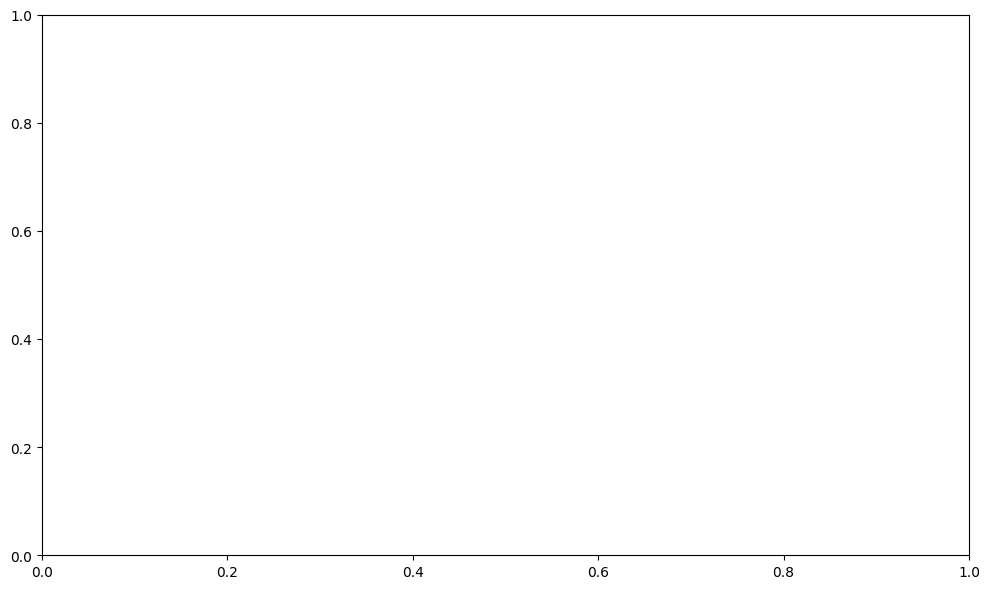

In [9]:
data_name = 'ncats-solubility'
run_name = 'classical_large_range_50%_kernel_grid'

file_name = 'Polaris/' + data_name + '.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)

slice_sizes = [int(177/n) for n in [3]]
N = 1

# with open('results/slice_study_pgp-broccatelli_QA.pkl', 'rb') as file:
#     slice_study_results = pickle.load(file)
# start = len(slice_study_results['param_grids'])
# data_sets, test_values_list, best_params, param_tables, cv_results, search_spaces, = slice_study_results['datasets'], slice_study_results['test_values'], slice_study_results['best_params'], slice_study_results['param_tables'], slice_study_results['cv_results'], slice_study_results['param_grids']

start = 0
test_values_list, best_params, param_tables, cv_results = ({slice_size: [] for slice_size in slice_sizes} for _ in range(4))
datasets, search_spaces = [], []

for i in tqdm(range(start,N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    # search_space = {
    #     'kernel': sks.Real(0.05 * default_gamma, 10 * default_gamma, prior='uniform'),
    # }
    search_space = {'upper_bound': [1], 'kernel': [default_gamma * n for n in [0.05,0.1,0.2,0.3,0.4,0.5,0.75,1,1.5,2,3,5,7.5,10]]}
    search_spaces += [search_space]
    datasets += [(vectors, labels, test_vectors, test_labels)]
    inner_estimator = svm.cSVM_estimator(solver='SVC', adjust_bias=False)
    for s, slice_size in enumerate(slice_sizes):
        print('Slice size: ', slice_size)
        estimator = svm.slice_estimator(estimator=inner_estimator, slice_size=slice_size, force_unbiased=False, adjust_outer_bias=True, seed=0)
        #limit = 20
        # f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator=estimator, search_space=search_space, vectors=vectors, labels=labels, folds=5, mode='bayes', limit=20, filter=None, print_info='q', seed=0)
        f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator=estimator, search_space=search_space, vectors=vectors, labels=labels, folds=5, mode='grid', limit=None, filter=None, print_info=2, seed=0)
        # save results:
        test_values = f(test_vectors)
        test_values_list[slice_size] += [test_values]
        param_tables[slice_size] += [param_table]
        best_params[slice_size] += [optimal_params]
        cv_results[slice_size] += [opt.cv_results_]    
        slice_study_results = {
            'data_sets' : datasets,
            'test_values': test_values_list, 
            'best_params': best_params, 
            'param_tables': param_tables, 
            'cv_results': cv_results, 
            'param_grids': search_spaces
        }
        # with open('results/slice_study_' + data_name + '_' + run_name + '.pkl','wb') as f:
        #     pickle.dump(slice_study_results, f)
plot_kappas_per_params(slice_study_results)

C:\Users\oszal\AppData\Local\Temp\ipykernel_29828\3010319560.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


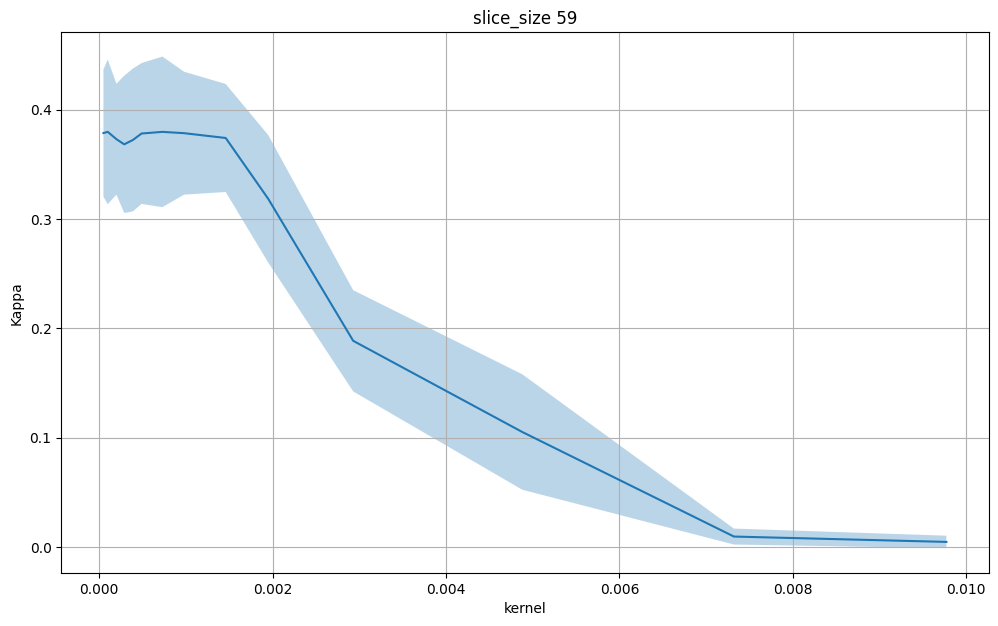

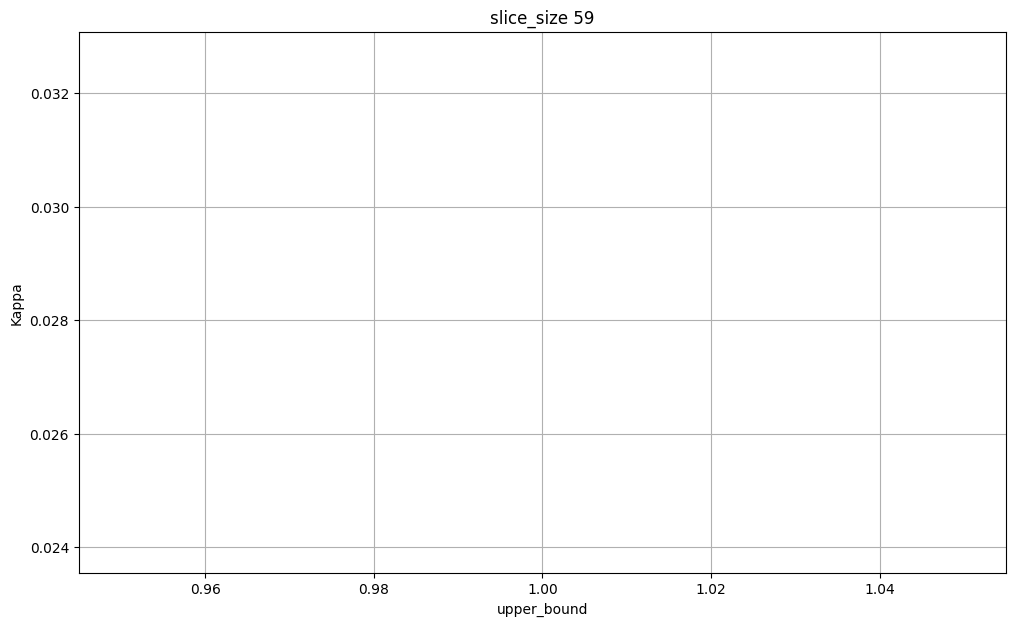

In [21]:
plot_kappas_per_params(slice_study_results)

  0%|          | 0/1 [00:00<?, ?it/s]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (523 positive, 703 negative)
Slice size:  59
Fitting 4 folds for each of 14 candidates, totalling 56 fits
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=4.882812499999997e-05, sliced__estimator__num_encoding=2, sliced__estimator__penalty=1; total time=  16.1s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=4.882812499999997e-05, sliced__estimator__num_encoding=2, sliced__estimator__penalty=1; total time=  16.0s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=4.882812499999997e-05, sliced__estimator__num_encoding=2, sliced__estimator__penalty=1; total time=  16.2s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=4.882812499999997e-05, sliced__estimator__num_encoding=2, sliced__estimator__penalty=1; total time=  16.3s
[CV] END sliced__estimator__base=2, sliced__estimator__kernel=9.765624999999994e-05,

100%|██████████| 1/1 [15:52<00:00, 952.06s/it]
C:\Users\oszal\AppData\Local\Temp\ipykernel_29828\3010319560.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


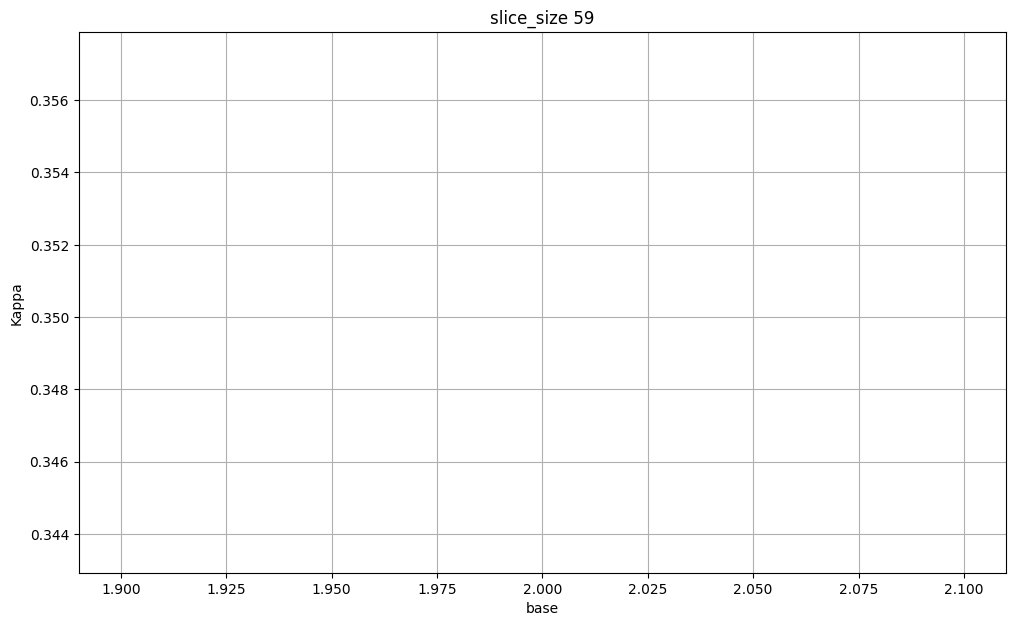

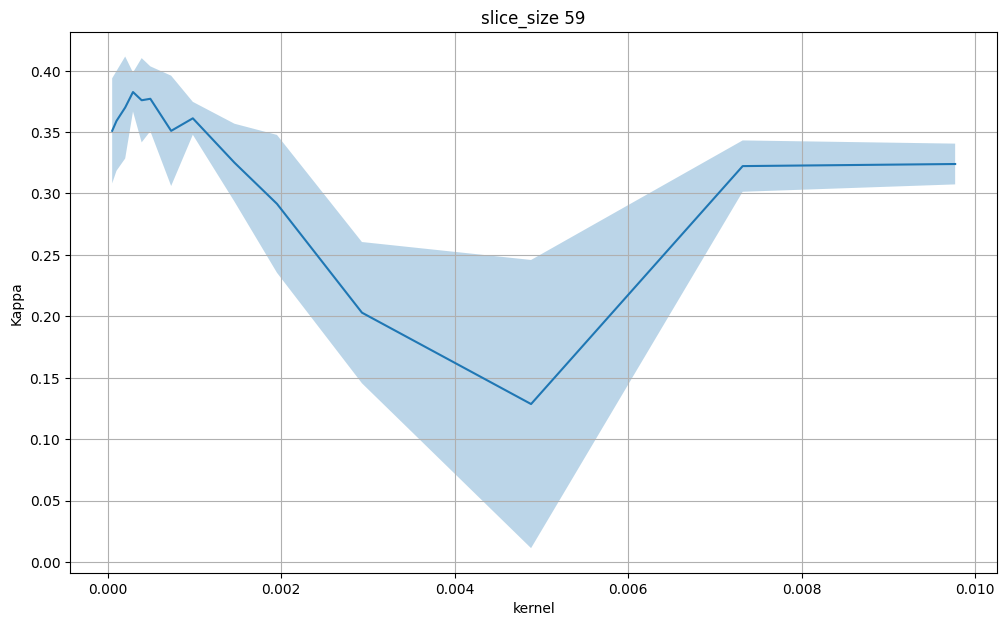

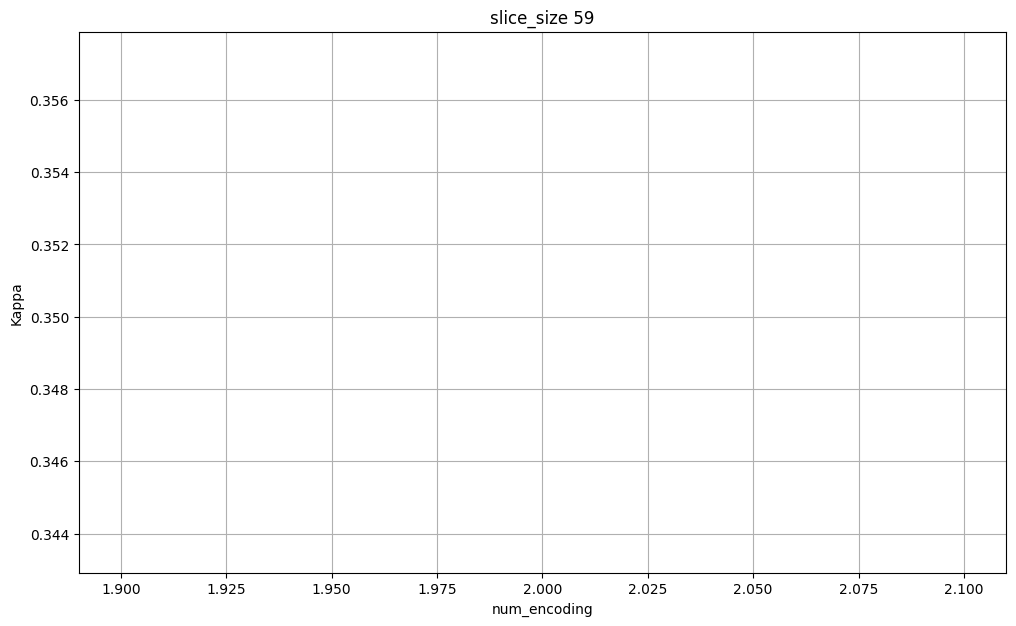

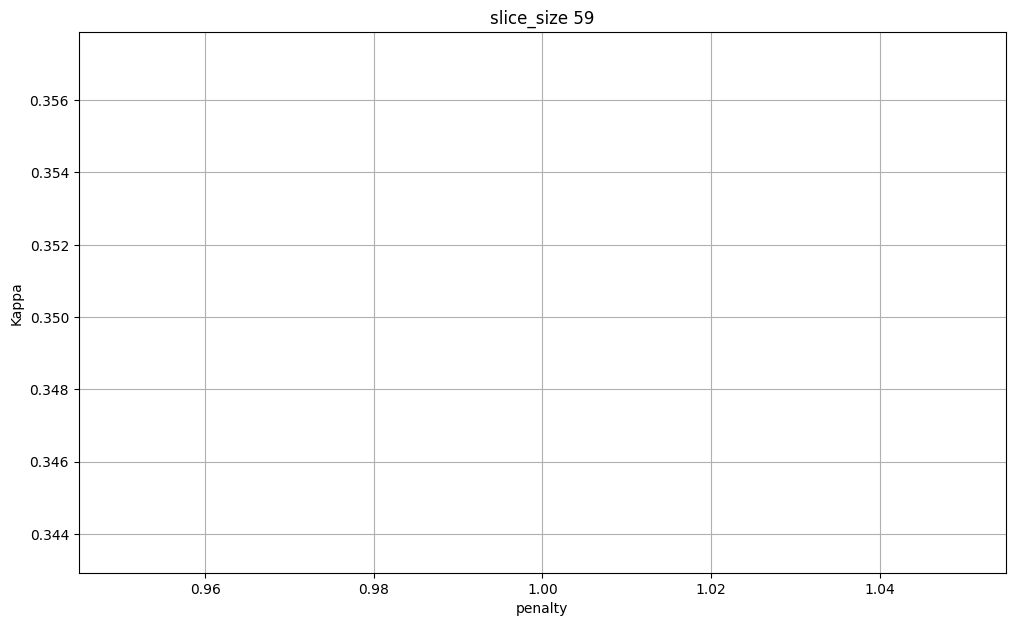

In [23]:
data_name = 'ncats-solubility'
run_name = 'SA_large_range_50%'

file_name = 'Polaris/' + data_name + '.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)

slice_sizes = [int(177/n) for n in [3]]
# limits = [34,26,18,12]
N = 1

# with open('results/slice_study_pgp-broccatelli_QA.pkl', 'rb') as file:
#     slice_study_results = pickle.load(file)
# start = len(slice_study_results['param_grids'])
# data_sets, test_values_list, best_params, param_tables, cv_results, search_spaces, = slice_study_results['datasets'], slice_study_results['test_values'], slice_study_results['best_params'], slice_study_results['param_tables'], slice_study_results['cv_results'], slice_study_results['param_grids']

start = 0
test_values_list, best_params, param_tables, cv_results = ({slice_size: [] for slice_size in slice_sizes} for _ in range(4))
datasets, search_spaces = [], []

for i in tqdm(range(start,N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=True)
    default_gamma = 1 / (vectors.shape[1] * vectors.var())
    # search_space = {
    #     'base': sks.Categorical([2,10,100]),
    #     'num_encoding': sks.Integer(1,4),
    #     'kernel': sks.Real(0.05 * default_gamma, 10 * default_gamma, prior='uniform'),
    #     'penalty': sks.Real(0,10),
    # }
    search_space = {
        'base': [2],
        'num_encoding': [2],
        'kernel': [default_gamma * n for n in [0.05,0.1,0.2,0.3,0.4,0.5,0.75,1,1.5,2,3,5,7.5,10]],
        'penalty': [1],
    }
    search_spaces += [search_space]
    datasets += [(vectors, labels, test_vectors, test_labels)]
    inner_estimator = svm.qSVM_estimator(solver='SA', adjust_bias=False)
    for s, slice_size in enumerate(slice_sizes):
        print('Slice size: ', slice_size)
        estimator = svm.slice_estimator(estimator=inner_estimator, slice_size=slice_size, force_unbiased=False, adjust_outer_bias=True, seed=0)
        # limit = limits[s]
        f, param_table, opt, optimal_params = svm.hyperparameter_optimization(estimator=estimator, search_space=search_space, vectors=vectors, labels=labels, folds=4, mode='grid', limit=None, filter=None, print_info=2, seed=0)
        # save results:
        test_values = f(test_vectors)
        test_values_list[slice_size] += [test_values]
        param_tables[slice_size] += [param_table]
        best_params[slice_size] += [optimal_params]
        cv_results[slice_size] += [opt.cv_results_]    
        slice_study_results_SA = {
            'data_sets' : datasets,
            'test_values': test_values_list, 
            'best_params': best_params, 
            'param_tables': param_tables, 
            'cv_results': cv_results, 
            'param_grids': search_spaces
        }
        # with open('results/slice_study_' + data_name + '_' + run_name + '.pkl','wb') as f:
        #     pickle.dump(slice_study_results, f)
        # skopt.dump(opt, 'results/opts/' + data_name + '_' + run_name + '_N' + str(i) + '_slice_size' + str(slice_size) + '.pkl', store_objective=True)
plot_kappas_per_params(slice_study_results_SA)

In [ ]:
[21,24,29,36,68] + [int(177/n) for n in [4,3,2,1]] + [203, 228, 305, 456, 609]

In [18]:
file_name = 'Polaris/' + 'pgp-broccatelli' + '.parquet'
# file_name = 'Polaris/' + 'bbb-martins' + '.parquet'
slice_size = 20
print(slice_size)
force_unbiased = True # bool(file_name == 'Polaris/' + 'bbb-martins' + '.parquet')
matrix, matrix_labels, names = svm.read_parquet(file_name)
N = 5
num_slices = []
num_fold_slices = []
for i in range(N):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=False)
    slices, slice_labels, counts = svm.slice_training_data(vectors, labels, slice_size=slice_size, force_unbiased=force_unbiased, print_info=True, seed=0)
    num_slices += [len(slices)]
    print('slice_size:', len(slices[0]))
    fold_vectors, fold_labels, fold_test_vectors, fold_test_labels = svm.prepare_data_sets(vectors, labels, train_percentage=75, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=0, normalize_data=True, print_info=False)
    fold_slices, fold_slice_labels, fold_counts = svm.slice_training_data(fold_vectors, fold_labels, slice_size=slice_size, force_unbiased=force_unbiased, print_info=False, seed=0)
    num_fold_slices += [len(fold_slices)]
    print('Fold slice size:', len(fold_slices[0]))
print('numbers of slices:', set(num_slices))
print('numbers of fold slices:', set(num_fold_slices))

20
Variance in negative vector appearences:  1.218432445626341
slice_size: 20
Fold slice size: 20
Variance in negative vector appearences:  1.197148405426892
slice_size: 20
Fold slice size: 20
Variance in negative vector appearences:  1.0752980232382678
slice_size: 20
Fold slice size: 20
Variance in negative vector appearences:  1.1566939701050487
slice_size: 20
Fold slice size: 20
Variance in negative vector appearences:  1.0022162839882982
slice_size: 20
Fold slice size: 20
numbers of slices: {32, 33}
numbers of fold slices: {24, 26, 23}


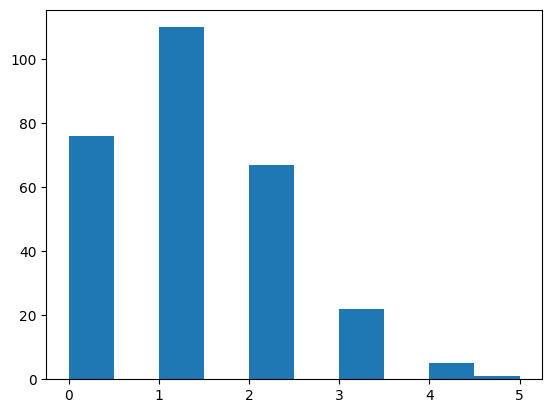

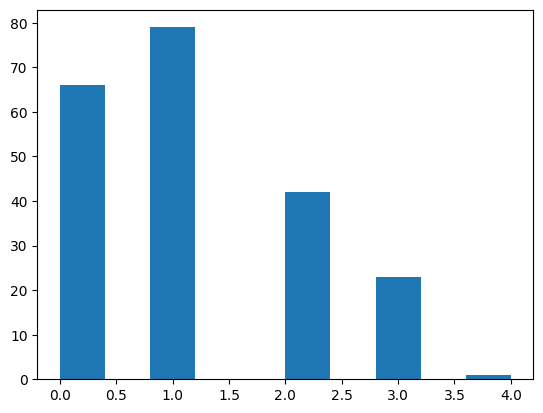

In [19]:
plt.hist(counts)
plt.show()
plt.hist(fold_counts)
plt.show()

In [71]:
len(labels), np.count_nonzero(labels>0), np.count_nonzero(labels<0)

(609, 328, 281)

In [84]:
seed = 0
training_vectors = vectors
training_labels = labels
N, d = training_vectors.shape
pos_vectors = np.array([vector for vector, label in zip(training_vectors, training_labels) if label > 0])
neg_vectors = np.array([vector for vector, label in zip(training_vectors, training_labels) if label < 0])
assert len(neg_vectors) > 0, 'Please include data with negative labels.'
print(len(pos_vectors), len(neg_vectors))
#slice_size_fixed = True if slice_size else False
while True:
    print('loop')
    # distribute positive vectors:
    num_slices = round(2*len(pos_vectors)/slice_size)
    print(num_slices)
    num_positive_per_slice = len(pos_vectors) // num_slices * np.ones(num_slices, dtype=int) + np.append(np.ones(len(pos_vectors) % num_slices, dtype=int), np.zeros(num_slices - len(pos_vectors) % num_slices, dtype=int))
    pos_vectors = skl.utils.shuffle(pos_vectors, random_state=seed)
    slices = [np.append(pos_vectors[int(np.sum(num_positive_per_slice[:i])):int(np.sum(num_positive_per_slice[:i]) + num_positive)], np.zeros((int(slice_size - num_positive),d)), axis=0) for i, num_positive in enumerate(num_positive_per_slice)]
    if len(neg_vectors) >=  np.max(slice_size - num_positive_per_slice):
        break
    slice_size -= 1
assert slice_size > 1, 'Please choose more than just one vector per slice'
assert len(neg_vectors) >=  np.max(slice_size - num_positive_per_slice), 'Choose smaller slices, such that we have enough negative data to fill them.'
# complement with random instances of neg_vectors:
for i, num_positive in enumerate(num_positive_per_slice):
    neg_slice = neg_vectors[np.random.choice(len(neg_vectors), int(slice_size - num_positive), replace=False)]
    slices[i][num_positive:] = neg_slice
# extract labels
slice_labels = np.array([np.append(np.ones(num_positive), -np.ones(slice_size - num_positive)) for num_positive in num_positive_per_slice])
print(np.count_nonzero(slice_labels > 0) , np.count_nonzero(slice_labels < 0))

328 281
loop
1
328 122


In [86]:
num_positive_per_slice

array([328])

In [85]:
2*len(pos_vectors)/slice_size

1.4577777777777778

In [78]:
np.count_nonzero(slice_labels > 0) , np.count_nonzero(slice_labels < 0),

(328, 122)

In [2]:
estimator = svm.qSVM_estimator(solver=('SA',200), base=2, num_encoding=2, kernel=0.4, penalty=1, adjust_bias=False)


In [3]:
estimator.penalty = 3
estimator

qSVM_estimator(kernel=0.4, num_encoding=2, penalty=3, solver=('SA', 200))

In [16]:
data_name = 'ncats-solubility'

run_name = 'SA_larger_range_50%_grid_penalty_no_bias_adjustment'

file_name = 'Polaris/' + data_name + '.parquet'
matrix, matrix_labels, names = svm.read_parquet(file_name)

slice_sizes = [int(177/n) for n in [3]]
N = 2

start = 0
test_values_list, best_params, param_tables, cv_results = ({slice_size: [] for slice_size in slice_sizes} for _ in range(4))
datasets, search_spaces = [], []
all_test_values = {slice_size: [] for slice_size in slice_sizes}

for i in tqdm(range(start,N)):
    vectors, labels, test_vectors, test_labels = svm.prepare_data_sets(matrix, matrix_labels, train_percentage=50, positive_negative_ratio=None, max_train_size=None, min_train_size=None, seed=i, normalize_data=True, print_info=True)
    if i == 0:
        default_gamma = 1 / (vectors.shape[1] * vectors.var())
    search_space = {
        'penalty': [0.5 * n for n in range(20)] + [10 + n for n in range(41)],
    }
    search_spaces += [search_space]
    datasets += [(vectors, labels, test_vectors, test_labels)]
    inner_estimator = svm.qSVM_estimator(solver=('SA',100), base=2, num_encoding=2, kernel=0.4 * default_gamma, penalty=1, adjust_bias=False)
    for s, slice_size in enumerate(slice_sizes):
        print('Slice size: ', slice_size)
        estimator = svm.slice_estimator(estimator=inner_estimator, slice_size=slice_size, force_unbiased=False, adjust_outer_bias=False, seed=0)
        # calculate test values for each of the parameter values:
        penalty_test_values = {}
        for penalty in search_space['penalty']:
            print('Training penalty = ', penalty, end="\r")
            estimator.penalty = penalty
            estimator.fit(vectors, labels)
            penalty_test_values[penalty] = estimator.decision_function(test_vectors)
            print(estimator.decision_function(test_vectors))

  0%|          | 0/2 [00:00<?, ?it/s]

Data size: 2453 (1054 positive, 1399 negative)
0 vectors removed due to inconsistently labelled degeneracies
Training data size: 1226 (523 positive, 703 negative)
Slice size:  59
[-0.19599849 -0.0717836   0.24122255 ... -0.15481759  0.00561782
 -0.20566255]
[-0.19599849 -0.0717836   0.24122255 ... -0.15481759  0.00561782
 -0.20566255]


  0%|          | 0/2 [00:49<?, ?it/s]


KeyboardInterrupt: 

In [22]:
inner_estimator.penalty = 30
#estimator.set_params(penalty=30)
estimator.fit(vectors, labels)
estimator.decision_function(test_vectors)

array([-0.13344199, -0.03226169,  0.2778849 , ..., -0.09260021,
        0.04879296, -0.12616437])

In [23]:
inner_estimator.penalty = 0
#estimator.penalty = 0
estimator.fit(vectors, labels)
estimator.decision_function(test_vectors)

array([-0.22130215, -0.1140538 ,  0.21471228, ..., -0.19811612,
       -0.04498966, -0.19265408])

In [20]:
estimator

slice_estimator(estimator=qSVM_estimator(kernel=0.00039062499999999975,
                                         num_encoding=2, penalty=1,
                                         solver=('SA', 100)),
                seed=0, slice_size=59)